# TPM034A Machine Learning for socio-technical systems 
## `Lab session 01: Discover, explore and visualise data`

**Delft University of Technology**<br>
**Q2 2025**<br>
**Instructor:** Sander van Cranenburgh & Francisco Garrido Valenzuela<br>

### `Instructions`

**Lab session aim to:**<br>
* Show and reinforce how models and ideas presented in class are put to practice.<br>
* Help you gather hands-on machine learning skills.<br>

**Lab sessions are:**<br>
* Learning environments where you work with Jupyter notebooks and where you can get support from TAs and fellow students.<br> 
* Not graded and do not have to be submitted. 
* A good preparation for the **assignments** (which are graded).
<br><br><br>

### `Use of AI tools`
AI tools, such as ChatGPT and GitHub Copilot, can be valuable aids for programming. In your later careers, you will also work in an environment where such tools are widely available. However, they cannot replace your own reasoning: you still need to conceptualise the problem, break it down, and structure it to conduct proper analysis. We therefore **encourage** you to use AI tools responsibly — as a support, not a substitute for your own thinking.  
> ⚠️ **Important:** During the *practical exam* you will **NOT** have access to these tools (since internet access will be restricted).

### `Google Colab workspace set-up`

Uncomment the following cells code lines if you are running this notebook on Colab

In [1]:
#!git clone https://github.com/TPM034A/Q2_2025
#!pip install -r Q2_2025/requirements_colab.txt
#!mv "/content/Q2_2025/Lab_sessions/lab_session_01/data" /content/data

### `Application: liveability in the Netherlands` <br>
In this lab session, we will explore how liveable the Netherlands is. Liveability is high on the policy agenda. Many policies directly or indirectly aim to improve liveability, such as e.g. lowering traffic speed, curbing noise levels, maintaining public gardens and spaces, etc. But liveability is hard to study due to its elusive and complex subjective nature. In this lab session, we will discover how liveability is spatially distributed, and what factors associate positively or negatively with liveability.<br>

**Learning objectives**. After completing the following exercises you will be able to: <br>
1. Construct a data set from multiple sources using `pandas`<br>
2. Discover and visualise data, using `seaborn` and `geopandas`<br>
3. Explore associations using scatter plots and correlation heat maps<br>
4. Conduct linear regression, using `sk-learn`<br>

In [2]:
# Import required Python packages and modules
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


# Import selected functions and classes from Python packages
from os import getcwd
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### 1. Constructing a data set from multiple data sources<br>
To construct a data set from multiple data sources, we will:<br>
- A. **Load** the 3 data sets:<br>
    - A.1. Liveability data<br>
    - A.2. Population statistics data<br>
    - A.3. geospatial data<br>
- B. **Clean** the data<br>
- C. **Combine** the data<br>

##### A. Loading data <br>

We first load our primary data source on **liveability**. There are three liveability data sets, with varying **spatial levels**: <br>
* `Gemeente`  Municipality 
* `Wijk`      Neighbourhood
* `Buurt`     Local neighbourhood

In [48]:
# Get the current working directory
working_folder = getcwd()
data_folder = Path(f'data')
print(data_folder)

data


In [49]:
# Load liveability data, using pandas
gemeente_liv_data = pd.read_csv(data_folder/'gemeente_liveability.csv')
wijk_liv_data = pd.read_csv(data_folder/'wijk_liveability.csv')
buurt_liv_data = pd.read_csv(data_folder/'buurt_liveability.csv')
print(list(gemeente_liv_data.keys()))

['gm_code', 'versie', 'jaar', 'gm_naam', 'lbm', 'afw', 'fys', 'onv', 'soc', 'vrz', 'won']


*Description of variables*<br>
`gm_code`&nbsp;&nbsp;&nbsp;Unique code for gemeente <br>
`versie `&nbsp;&nbsp;&nbsp;Version of the 'Leefbaarometer model' used <br>
`jaar   `&nbsp;&nbsp;&nbsp;&nbsp;&emsp;Year <br>
`gm_naam`&emsp;Name of gemeente <br>

*Liveability indicators:* <br>
`lbm`   &emsp;**lbm** is the **key variable of interest** in this lab session. It is composed of the variables below: <br>
`afw`   &emsp;Deviation from previous model <br>
`fys`   &emsp;Physical environment<br>
`onv`   &emsp;Nuisance and insecurity<br>
`soc`   &emsp;Social cohesion<br>
`vrz`   &emsp;Amenities<br>
`won`   &emsp;Housing stock<br>

We load the second source of data. These data contains population statistics.

In [50]:
# Load files on population statistics
gemeente_pop_data = pd.read_csv(data_folder/'gemeente_2020_pop.csv', sep=';')
wijk_pop_data = pd.read_csv(data_folder/'wijk_2020_pop.csv', sep=';')
buurt_pop_data = pd.read_csv(data_folder/'buurt_2020_pop.csv', sep=';')
gemeente_pop_data.keys()

Index(['GM_CODE', 'GM_NAAM', 'H2O', 'OAD', 'STED', 'BEV_DICHTH', 'AANT_INW',
       'AANT_MAN', 'AANT_VROUW', 'P_00_14_JR',
       ...
       'AF_PODIUM', 'AV5_PODIUM', 'AV10PODIUM', 'AV20PODIUM', 'AF_MUSEUM',
       'AV5_MUSEUM', 'AV10MUSEUM', 'AV20MUSEUM', 'JRSTATCODE', 'JAAR'],
      dtype='object', length=178)

Finally, we load data on the geospatial data of gemeenten, wijken and buurten. To do this, load the **shape files** using geopandas.

In [51]:
# Load shape files
gemeente_shape = gpd.read_file(data_folder/'gemeente/gemeente 2020.shp')
wijk_shape = gpd.read_file(data_folder/'wijk/wijk 2020.shp')
buurt_shape = gpd.read_file(data_folder/'buurt/buurt 2020.shp')
print(buurt_shape.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13808 entries, 0 to 13807
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   bu_code   13808 non-null  object  
 1   bu_naam   13808 non-null  object  
 2   gm_naam   13808 non-null  object  
 3   geometry  13808 non-null  geometry
dtypes: geometry(1), object(3)
memory usage: 431.6+ KB
None


In [52]:
# Ensure that the shape files are all in the right projection
gemeente_shape.to_crs(epsg=28992, inplace=True)
wijk_shape.to_crs(epsg=28992, inplace=True)
buurt_shape.to_crs(epsg=28992, inplace=True)

# Print crs info
print(gemeente_shape.crs)
print(wijk_shape.crs)
print(buurt_shape.crs)


EPSG:28992
EPSG:28992
EPSG:28992


In [54]:
gemeente_liv_data.versie

0       Leefbaarometer 1.0
1       Leefbaarometer 1.0
2       Leefbaarometer 2.0
3       Leefbaarometer 3.0
4       Leefbaarometer 2.0
               ...        
2480    Leefbaarometer 2.0
2481    Leefbaarometer 3.0
2482    Leefbaarometer 2.0
2483    Leefbaarometer 3.0
2484    Leefbaarometer 3.0
Name: versie, Length: 2485, dtype: object

##### B. Cleaning data
First, we clean the liveability data sets. <br>
More specifically, we: <br>
* Extract only those data points for which we have a liveability score.
* Extract only those data points that are created by `Leefbaarometer 3.0` and for year `2020`.

In [55]:
# Remove rows where lbm is NaN
gemeente_liv_data.dropna(subset = ['lbm'], inplace = True)

# Extract subsets: only year 2020 and Leefbaarometer 3.0 data
gemeente_liv_data = gemeente_liv_data.loc[(gemeente_liv_data.versie ==  'Leefbaarometer 3.0') & (gemeente_liv_data.jaar == 2020)]
wijk_liv_data.dropna(subset = ['lbm'], inplace = True)
wijk_liv_data = wijk_liv_data.loc[(wijk_liv_data.versie ==  'Leefbaarometer 3.0') & (wijk_liv_data.jaar == 2020)]
buurt_liv_data.dropna(subset = ['lbm'], inplace = True)
buurt_liv_data = buurt_liv_data.loc[(buurt_liv_data.versie ==  'Leefbaarometer 3.0') & (buurt_liv_data.jaar == 2020)]

Next, we clean the population data sets.<br>
More specifically, we: <br>
* Remove useless data points (i.e. water areas, opposed to land areas)
* Drop data points where the percentage of owner occupied homes and rented homes equals 0 (for later analyses)

In [56]:
def clean_pop_data(pop_data):

    # Extract subsets: only data where is land
    pop_data  = pop_data.loc[pop_data.H2O == 'NEE'] 

    # Remove rows where P_KOOPWON == 0 or P_HUURWON == 0
    pop_data = pop_data.loc[(pop_data.P_KOOPWON>0) | (pop_data.P_HUURWON>0)]

    return pop_data

gemeente_pop_data = clean_pop_data(gemeente_pop_data)
wijk_pop_data = clean_pop_data(wijk_pop_data)
buurt_pop_data = clean_pop_data(buurt_pop_data)

##### C. Combining data
Now, we pull together the population and liveability data sets, using pandas' `merge` function. We use `GM_CODE`, `WK_CODE` and `BU_CODE` as key indices to merge on.<br>
For the `merge` operation, the keys must be the same. Therefore, we first capitalise the keys of the shape files to be the same as in the other files.<br>

In [58]:
# Capitalise column name of variables to merge on (to be the same across data sets)
gemeente_liv_data.rename(columns={"gm_code": "GM_CODE"}, inplace=True)
wijk_liv_data.rename(columns={"wk_code": "WK_CODE"}, inplace=True)
buurt_liv_data.rename(columns={"bu_code": "BU_CODE"}, inplace=True)

# Merge DataFrames
gemeente_data = gemeente_pop_data.merge(gemeente_liv_data, on ="GM_CODE", how = "inner")
wijk_data = wijk_pop_data.merge(wijk_liv_data, on="WK_CODE", how = "inner")
buurt_data = buurt_pop_data.merge(buurt_liv_data, on="BU_CODE", how = "inner")

Next, we add the geospatial (shape) data, using `merge`. Again, we use `GM_CODE`, `WK_CODE`, and `BU_CODE` as indices.<br>
For the `merge` operation, the keys must be the same. Therefore, we first capitalise the keys of the shape files.<br>

In [59]:
# Capitalise column name of key variables
gemeente_shape = gemeente_shape.rename(columns={"gm_code": "GM_CODE"}).drop(columns = 'gm_naam')
wijk_shape = wijk_shape.rename(columns={"wk_code": "WK_CODE"}).drop(columns = 'wk_naam')
buurt_shape = buurt_shape.rename(columns={"bu_code": "BU_CODE"}).drop(columns = 'bu_naam')

# Merge the GeoDataFrame and the DataFrame
gemeente_df = gemeente_shape.merge(gemeente_data, on="GM_CODE")
wijk_df = wijk_shape.merge(wijk_data, on="WK_CODE")
buurt_df = buurt_shape.merge(buurt_data, on="BU_CODE")

### <span style="color:skyblue">Exercise 1: Exploring the data</span> 

`A` Load data file `Gemeenten alfabetisch 2020.excel` into a pandas DataFrame, using `pd.read_excel()`.<br>

`B` Explore the content, e.g. using `.describe()`, `.head()`, and `.info()`
<br>

`C` Add the provincies (i.e. the column `Provincienaam`) of the Netherlands to the `gemeente_df` DataFrame, the `wijk_df` DataFrame. and the `buurt_df` DataFrame.<br>
To do so, you need to merge two data set, based on the `GM_CODE`

In [13]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
path = Path(f'data')
gemeente2province = pd.read_excel(path/'gemeente2provincie_mapping2020.xlsx')
gemeente2province.head()

Gemeentecode GM_CODE   Gemeentenaam  Provinciecode ProvinciecodePV  \
0          1680  GM1680    Aa en Hunze             22            PV22   
1           358  GM0358       Aalsmeer             27            PV27   
2           197  GM0197         Aalten             25            PV25   
3            59  GM0059  Achtkarspelen             21            PV21   
4           482  GM0482   Alblasserdam             28            PV28   

   Provincienaam  
0        Drenthe  
1  Noord-Holland  
2     Gelderland  
3      Friesland  
4   Zuid-Holland

In [14]:
# B
gemeente2province.describe()

Gemeentecode  Provinciecode
count    355.000000     355.000000
mean     800.645070      26.690141
std      613.910254       3.073449
min        3.000000      20.000000
25%      311.000000      25.000000
50%      613.000000      27.000000
75%      991.000000      30.000000
max     1978.000000      31.000000

In [15]:
gemeente2province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gemeentecode     355 non-null    int64 
 1   GM_CODE          355 non-null    object
 2   Gemeentenaam     355 non-null    object
 3   Provinciecode    355 non-null    int64 
 4   ProvinciecodePV  355 non-null    object
 5   Provincienaam    355 non-null    object
dtypes: int64(2), object(4)
memory usage: 16.8+ KB


In [16]:
# C
print(gemeente2province.isnull().sum())
gemeente_df = gemeente_df.merge(gemeente2province, on = ['GM_CODE'], how= 'inner')
wijk_df = wijk_df.merge(gemeente2province, on= ['GM_CODE'], how = 'inner' )
buurt_df = buurt_df.merge(gemeente2province, on= ['GM_CODE'], how = 'inner' )

Gemeentecode       0
GM_CODE            0
Gemeentenaam       0
Provinciecode      0
ProvinciecodePV    0
Provincienaam      0
dtype: int64


GM_CODE                                           geometry  \
0    GM0003  POLYGON ((249539.95 593217.579, 249543.45 5932...   
1    GM0010  MULTIPOLYGON (((267829.905 587996.48, 267824.8...   
2    GM0014  POLYGON ((227979.943 584879.819, 227981.153 58...   
3    GM0024  POLYGON ((244952.159 601043.418, 244954.5 6010...   
4    GM0034  MULTIPOLYGON (((142993.687 482642.725, 142993....   
..      ...                                                ...   
350  GM1963  MULTIPOLYGON (((98666.226 412682.437, 98543 41...   
351  GM1966  MULTIPOLYGON (((215169.098 595155.688, 215169....   
352  GM1969  POLYGON ((211363.51 585818.36, 211364.156 5858...   
353  GM1970  MULTIPOLYGON (((207521.119 595796.903, 207521....   
354  GM1978  POLYGON ((102822.359 432749.868, 102817.412 43...   

                GM_NAAM  H2O   OAD  STED  BEV_DICHTH  AANT_INW  AANT_MAN  \
0            Appingedam  NEE  1066     3         490     11642      5671   
1              Delfzijl  NEE   678     4         185     24678     12429   
2             Groningen  NEE  3267     1        1255    232874    115838   
3             Loppersum  NEE   214     5          86      9537      4830   
4                Almere  NEE  1613     2        1640    211893    105130   
..                  ...  ...   ...   ...         ...       ...       ...   
350      Hoeksche Waard  NEE   825     4         325     87401     43211   
351        Het Hogeland  NEE   410     5          99     47801     24042   
352      Westerkwartier  NEE   475     5         175     63329     31810   
353  Noardeast-FryslÃ¢n  NEE   463     5         120     45228     22768   
354         Molenlanden  NEE   391     5         242     43909     22256   

     AANT_VROUW  ...              versie  jaar            gm_naam       lbm  \
0          5971  ...  Leefbaarometer 3.0  2020         Appingedam  4.066244   
1         12249  ...  Leefbaarometer 3.0  2020           Delfzijl  4.030777   
2        117036  ...  Leefbaarometer 3.0  2020          Groningen  4.177650   
3          4707  ...  Leefbaarometer 3.0  2020          Loppersum  4.127961   
4        106763  ...  Leefbaarometer 3.0  2020             Almere  4.022547   
..          ...  ...                 ...   ...                ...       ...   
350       44190  ...  Leefbaarometer 3.0  2020     Hoeksche Waard  4.087671   
351       23759  ...  Leefbaarometer 3.0  2020       Het Hogeland  4.118562   
352       31519  ...  Leefbaarometer 3.0  2020     Westerkwartier  4.172657   
353       22460  ...  Leefbaarometer 3.0  2020  Noardeast-Fryslân  4.114166   
354       21653  ...  Leefbaarometer 3.0  2020        Molenlanden  4.125291   

          afw       fys       onv       soc       vrz       won  
0   -0.036021  0.017464  0.013291  0.016685 -0.101019  0.017558  
1   -0.071488  0.036499 -0.000034  0.025425 -0.154673  0.021294  
2    0.075385  0.021706 -0.015533 -0.022861  0.091717  0.000356  
3    0.025696  0.012457  0.089088  0.069216 -0.204871  0.059806  
4   -0.079718  0.011499 -0.052280 -0.009295  0.003025 -0.032666  
..        ...       ...       ...       ...       ...       ...  
350 -0.014593  0.000644  0.076353  0.024366 -0.131843  0.015886  
351  0.016297  0.017308  0.075381  0.047374 -0.178285  0.054519  
352  0.070392  0.037533  0.074264  0.052570 -0.141491  0.047517  
353  0.011901  0.034374  0.082072  0.050541 -0.189266  0.034180  
354  0.023026 -0.004530  0.089176  0.042746 -0.128014  0.023648  

[355 rows x 189 columns]

#### 2. Discovering and visualising the data
After having constructed our data set, it is time to explore the data more in depth. To do so, we use pandas `describe`, `head` and `info` functions. Additionally, to visualise the data, we create histograms (empirical cumulative density function plots). This is done using **seaborn** package. 

Let's first look at the key variable of interest: `lbm` (liveability), and visualise its ditribution using a histogram and a cumulative density function plot. 

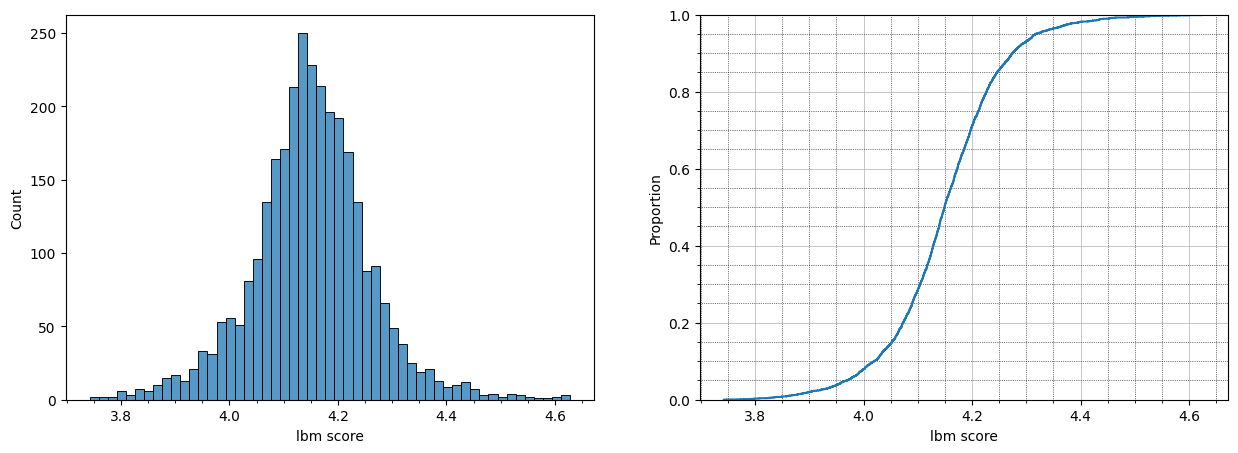

In [17]:
# Create histogram and empirical CDF for variable(s) of interest
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
sns.histplot(ax = axes[0],x = wijk_df.lbm)
ecdf_data = sns.ecdfplot(ax = axes[1],x = wijk_df.lbm)
axes[0].set_xlabel("lbm score")
axes[1].set_xlabel("lbm score")
axes[1].grid(True,linewidth = 0.5)
axes[1].minorticks_on()
axes[1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

**Interpretation of results**
* Liveability of wijken is approximately normally distributed (no skew / higher moments)
* The mean and median liveability of wijken is ~4.15
* The domain of liveability is ~ [3.7-4.6]

### <span style="color:skyblue">Exercise 2: Distribution of social cohesion</span> 
Besides liveability, in the liveability data there is also a variable on social cohesion `soc`.<br>
`A` Conduct several descriptive analyses, such as histograms, boxplots, etc, on the variable `soc`<br>
`B` Interpret your results

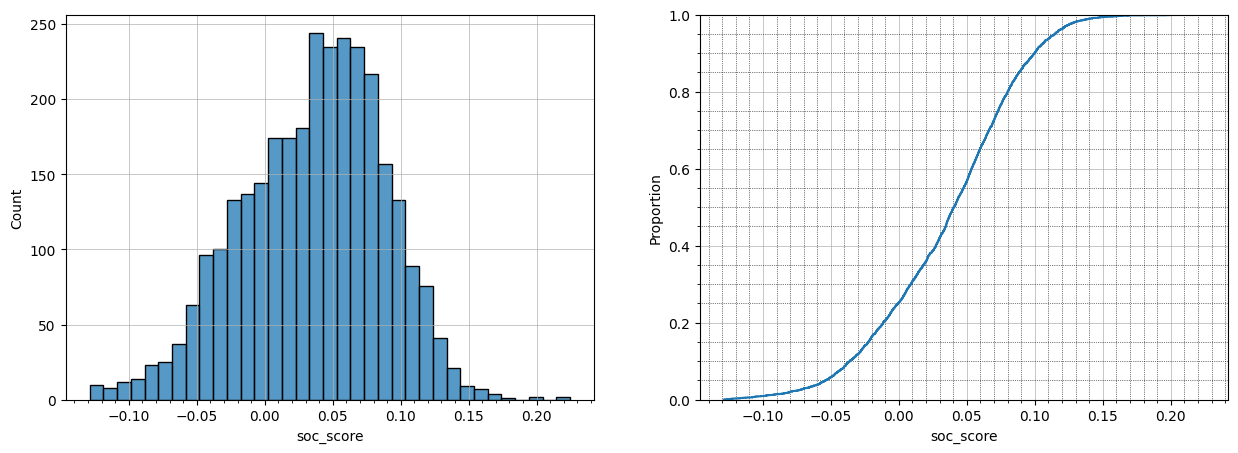

In [18]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A

fig,axes = plt.subplots(1,2, figsize = (15,5), sharex = True)
sns.histplot(ax = axes[0],x = wijk_df['soc'])
ecdf_data = sns.ecdfplot(ax = axes[1], x = wijk_df['soc'])
axes[0].set_xlabel('soc_score')
axes[1].set_xlabel('soc_score')
axes[1].grid(True, linewidth = 0.5)
axes[0].grid(True, linewidth = 0.5)
axes[1].minorticks_on()
axes[1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

<Axes: >

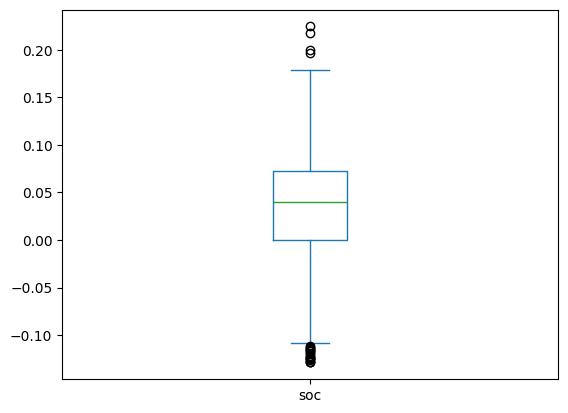

In [19]:
wijk_df['soc'].plot(kind = 'box')

In [20]:
wijk_df['soc'].describe()

count    3045.000000
mean        0.035446
std         0.052507
min        -0.128816
25%        -0.000523
50%         0.040425
75%         0.072944
max         0.224570
Name: soc, dtype: float64

In [21]:
# B

We see that the data is not normally distributed, but slightly skewed to the left side. It has an average of around 0.035.

An important step when discovering data is to evaluate their **face validity**. To do so, let's see whether to top-rated wijken seems to make sense.

In [22]:
# List top-5 best wijken, based on liveability
wijk_df.nlargest(5,'lbm').head(5)

WK_CODE        gm_naam  \
808   WK036302      Amsterdam   
828   WK036322      Amsterdam   
809   WK036303      Amsterdam   
119   WK009600       Vlieland   
1291  WK051810  's-Gravenhage   

                                               geometry              WK_NAAM  \
808   POLYGON ((120668.992 487465.601, 120670.593 48...  Grachtengordel-West   
828   POLYGON ((120016.875 486171.765, 120130.694 48...          Vondelbuurt   
809   POLYGON ((120757.415 486467.356, 120750.405 48...  Grachtengordel-Zuid   
119   MULTIPOLYGON (((138217.745 590528.676, 138315....              Wijk 00   
1291  POLYGON ((79575.76 456937.04, 79578.4 456936.4...    Wijk 10 Zorgvliet   

     GM_CODE        GM_NAAM  IND_WBI  H2O    OAD  STED  ...       fys  \
808   GM0363      Amsterdam        1  NEE  10678     1  ...  0.003124   
828   GM0363      Amsterdam        1  NEE   9724     1  ... -0.016662   
809   GM0363      Amsterdam        1  NEE   9272     1  ...  0.022858   
119   GM0096       Vlieland        1  NEE    208     5  ...  0.376499   
1291  GM0518  's-Gravenhage        1  NEE   4163     1  ...  0.087135   

           onv       soc       vrz       won  Gemeentecode   Gemeentenaam  \
808  -0.057002 -0.057766  0.612074  0.025129           363      Amsterdam   
828  -0.032454 -0.051559  0.594127  0.027747           363      Amsterdam   
809  -0.097292 -0.040515  0.607788  0.027745           363      Amsterdam   
119   0.122632  0.033750 -0.043568  0.008214            96       Vlieland   
1291  0.072620  0.014838  0.233574  0.087249           518  's-Gravenhage   

      Provinciecode  ProvinciecodePV  Provincienaam  
808              27             PV27  Noord-Holland  
828              27             PV27  Noord-Holland  
809              27             PV27  Noord-Holland  
119              21             PV21      Friesland  
1291             28             PV28   Zuid-Holland  

[5 rows x 198 columns]

### <span style="color:skyblue">Exercise 3: Face validity of worst neighbourhoods (wijken)</span> 
The best scoring neighbourhoods seem to make sense. Let's also look at the worst scoring neighbourhoods.<br>
`A` List the 10 neighourhoods (wijken) which score lowest on `lbm`

In [23]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
wijk_df.nsmallest(5, 'lbm')

WK_CODE        gm_naam  \
69    WK008050     Leeuwarden   
1311  WK051830  's-Gravenhage   
735   WK034403        Utrecht   
1160  WK047912       Zaanstad   
1916  WK085539        Tilburg   

                                               geometry  \
69    POLYGON ((183883.611 580216.812, 183875.967 58...   
1311  POLYGON ((79514.87 453802.13, 79503.54 453827....   
735   POLYGON ((134335.839 458999.112, 134250.809 45...   
1160  POLYGON ((118678.807 495146.424, 118695.683 49...   
1916  POLYGON ((130930.719 399235.829, 131258.299 39...   

                        WK_NAAM GM_CODE        GM_NAAM  IND_WBI  H2O   OAD  \
69      Heechterp & Schieringen  GM0080     Leeuwarden        1  NEE  2395   
1311  Wijk 30 Transvaalkwartier  GM0518  's-Gravenhage        1  NEE  7941   
735           Wijk 03 Overvecht  GM0344        Utrecht        1  NEE  3276   
1160         Wijk 12 Poelenburg  GM0479       Zaanstad        1  NEE  2176   
1916            Wandelbos Noord  GM0855        Tilburg        1  NEE  2018   

      STED  ...       fys       onv       soc       vrz       won  \
69       2  ...  0.032619 -0.241097 -0.078192 -0.009183 -0.064056   
1311     1  ... -0.041024 -0.284179 -0.117140  0.234298 -0.146054   
735      1  ... -0.030176 -0.246043 -0.087676  0.103762 -0.074552   
1160     2  ... -0.008356 -0.185486 -0.073643  0.061053 -0.121695   
1916     2  ... -0.019296 -0.158182 -0.055536 -0.023011 -0.065888   

      Gemeentecode   Gemeentenaam  Provinciecode  ProvinciecodePV  \
69              80     Leeuwarden             21             PV21   
1311           518  's-Gravenhage             28             PV28   
735            344        Utrecht             26             PV26   
1160           479       Zaanstad             27             PV27   
1916           855        Tilburg             30             PV30   

      Provincienaam  
69        Friesland  
1311   Zuid-Holland  
735         Utrecht  
1160  Noord-Holland  
1916  Noord-Brabant  

[5 rows x 198 columns]

As we have added geospatial data to the dataframe, we can visualise the data in space. <br> 
To further discover the data, let's first look at the municipality level. We color municipalities based on the average liveability score.

0              Annotation(252454, 593289, 'Appingedam')
1                Annotation(257817, 593715, 'Delfzijl')
2               Annotation(237387, 582036, 'Groningen')
3               Annotation(244314, 595752, 'Loppersum')
4                  Annotation(145429, 486600, 'Almere')
                             ...                       
350       Annotation(90712.7, 420631, 'Hoeksche Waard')
351          Annotation(231164, 599863, 'Het Hogeland')
352        Annotation(218511, 581739, 'Westerkwartier')
353    Annotation(197094, 594207, 'Noardeast-FryslÃ¢n')
354           Annotation(117683, 433044, 'Molenlanden')
Length: 355, dtype: object

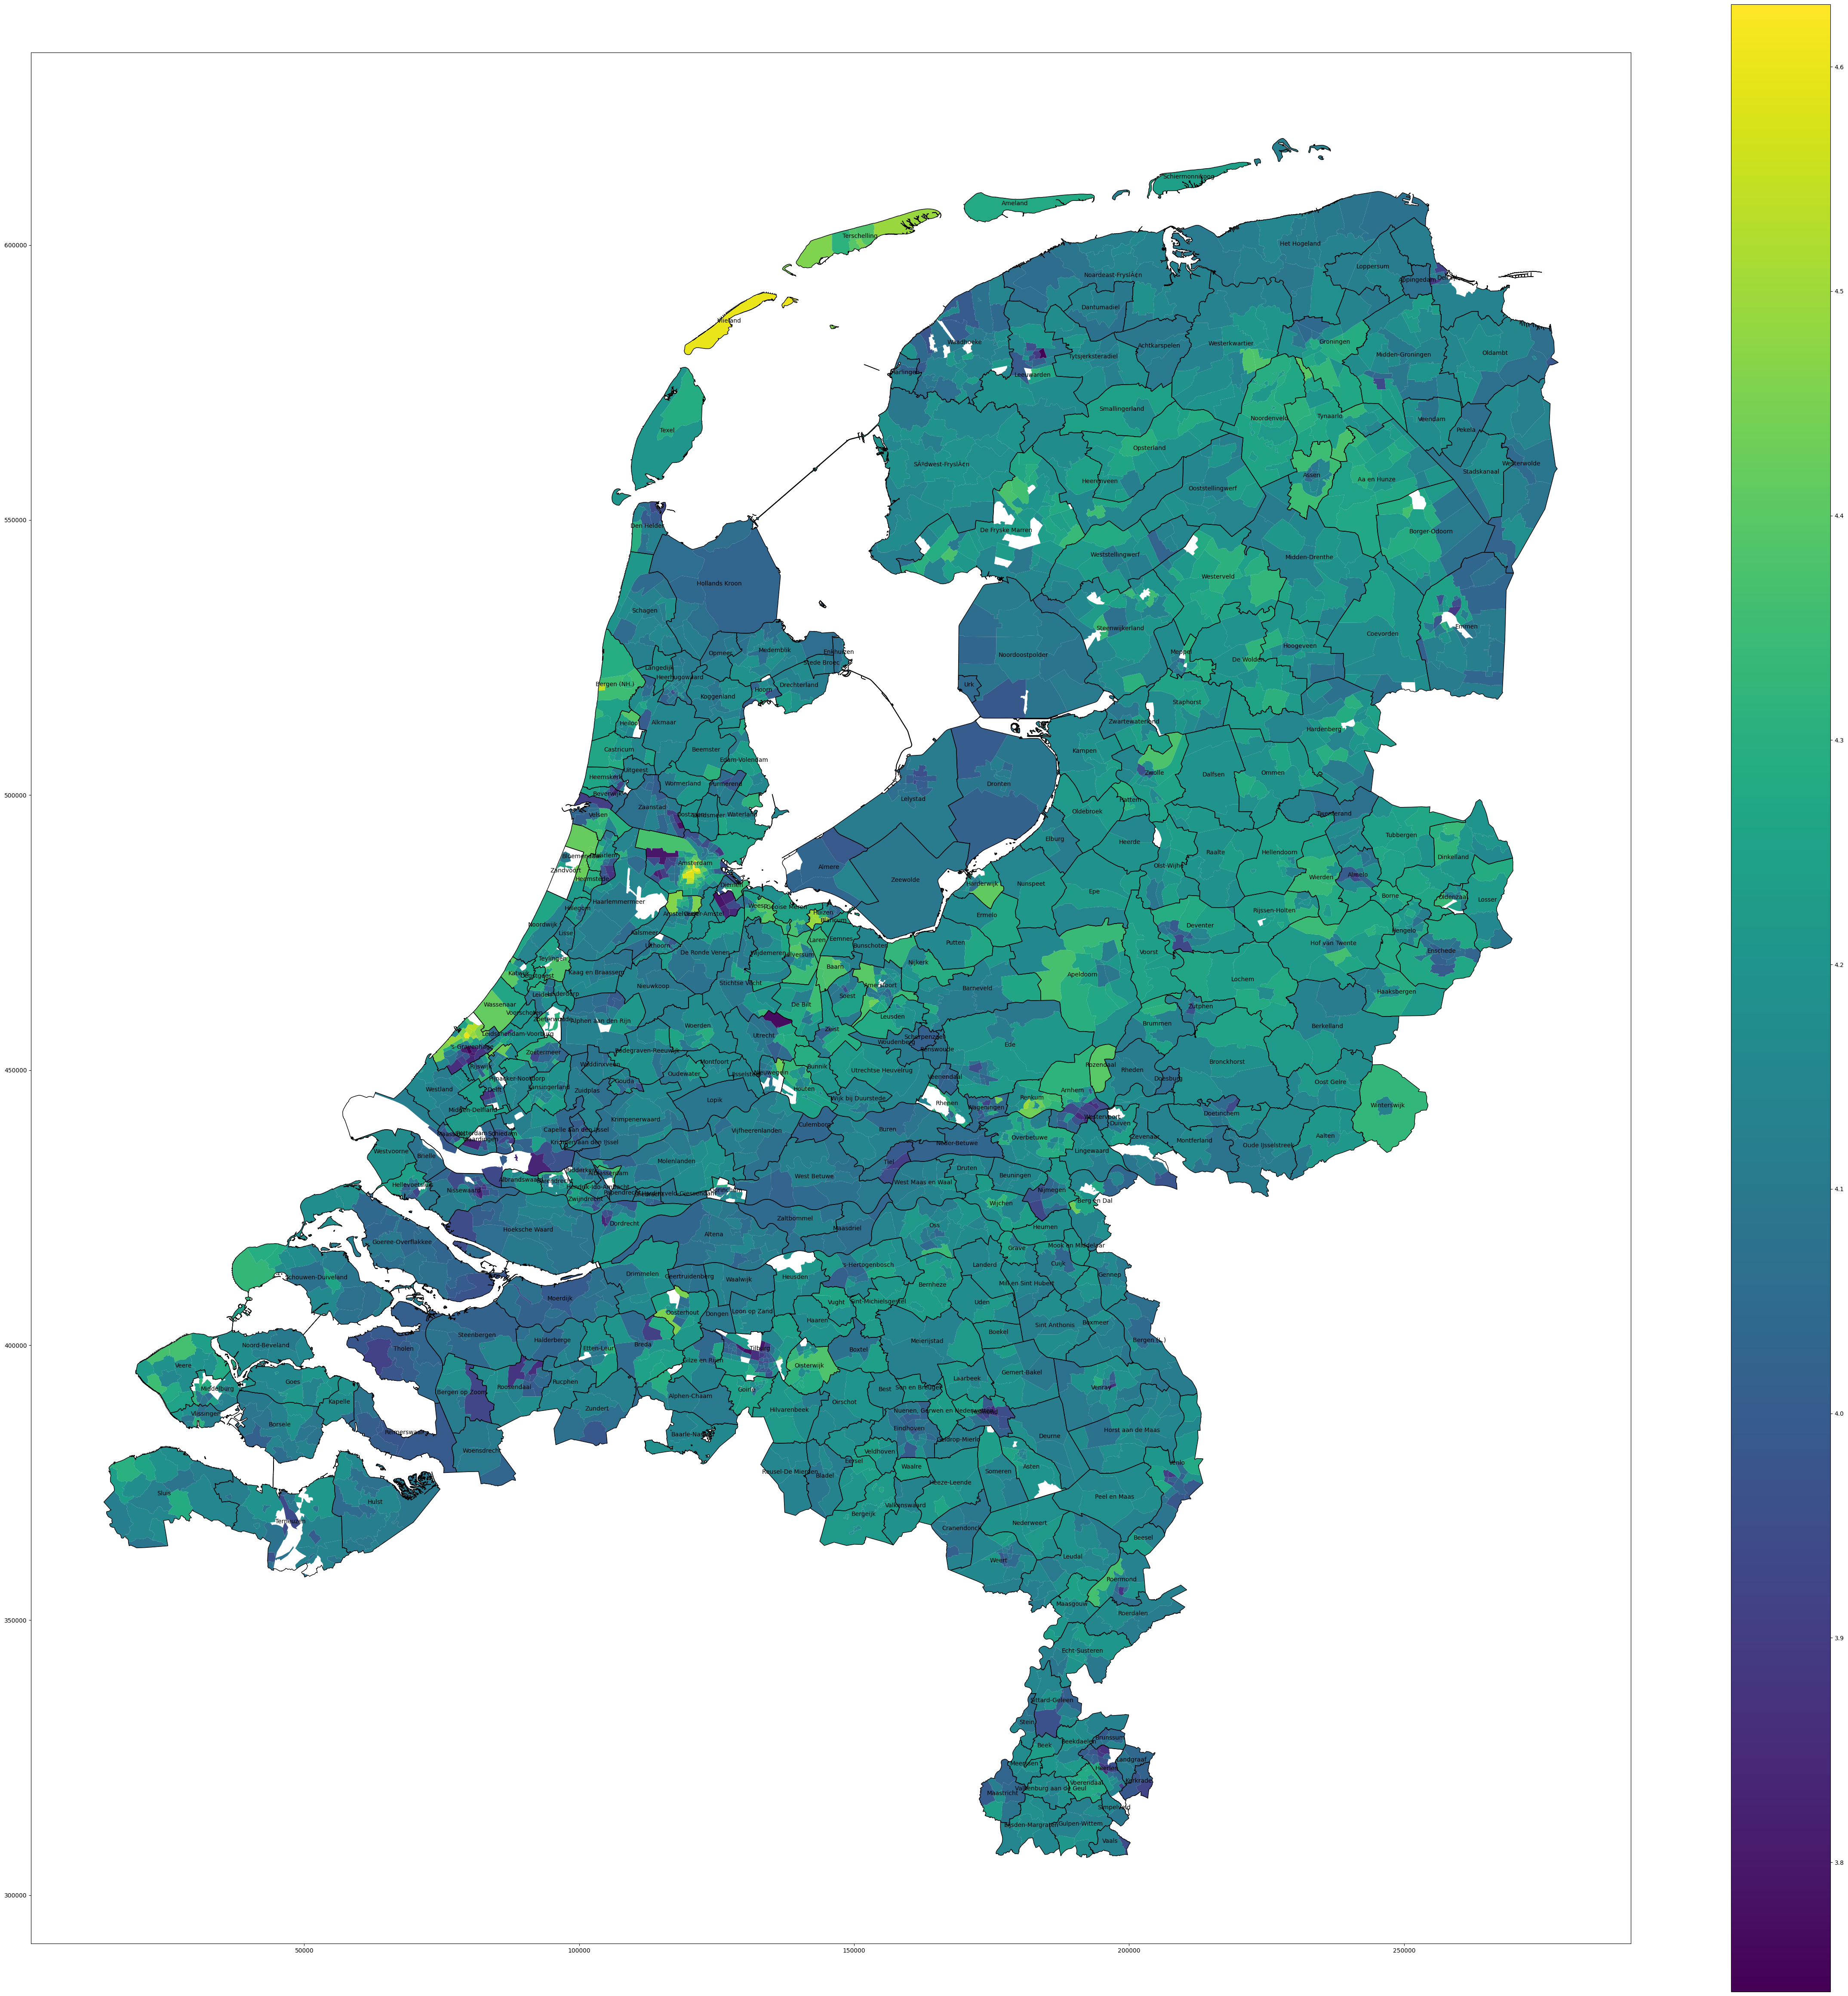

In [63]:
# Plot the liveability in the Netherlands at the wijk-level
fig, ax = plt.subplots(figsize=(60,60))
wijk_df.plot(ax=ax, column = 'lbm', legend = True)
gemeente_df.plot(ax=ax, color  = 'none', edgecolor='black')
gemeente_df.apply(lambda x: ax.annotate(text=x['GM_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# gemeente_df.apply(lambda x: '' if x['AANT_INW']<50000 else ax.annotate(text=x['GM_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

**Interpretation of results**
* Wijken located near the coast (including the islands) score above average.
* Larger cities (e.g. AMS, RT, Tilburg, Utrecht, The Hague) seem to have multiple very poor performing wijken
* In some municipalities, data are patchy (missing)

Next, we do the same, but at the lowest spatial level (buurten) focusing on the municipality of Delft. 

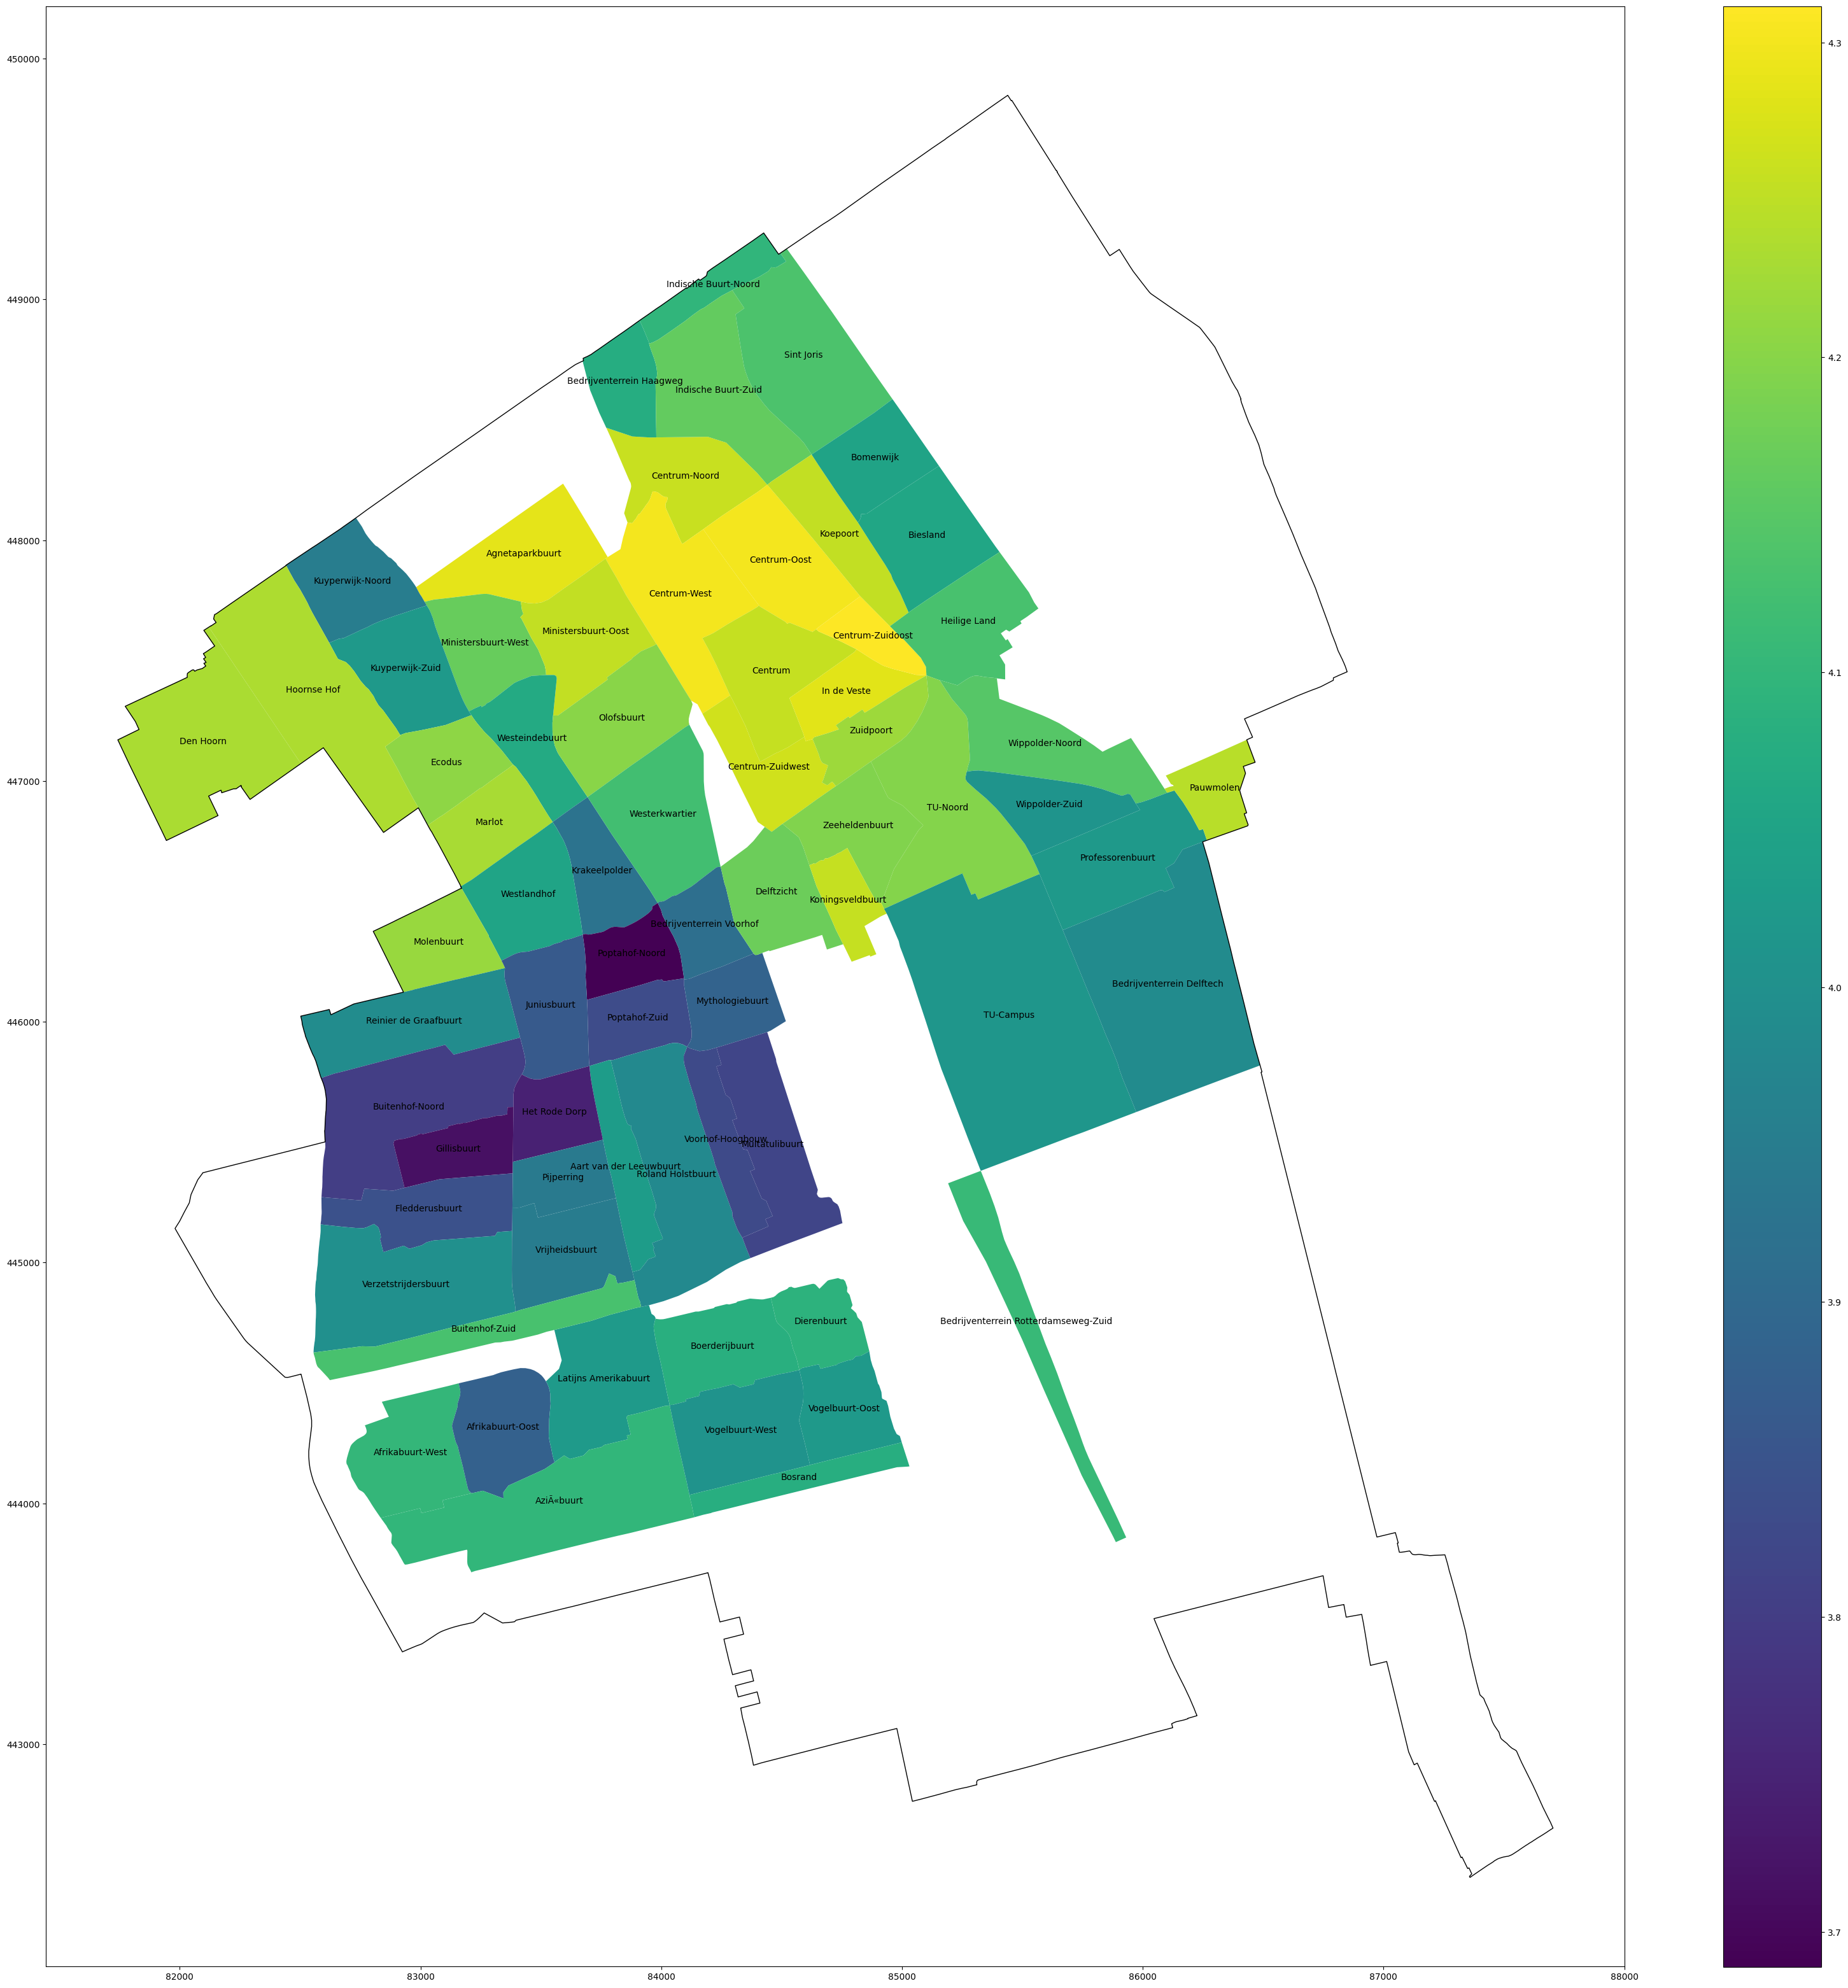

In [25]:
# Plot the liveability in Delft at the buurt-level
fig, ax = plt.subplots(figsize=(40,40))
buurt_df.loc[buurt_df.GM_NAAM == 'Delft'].plot(ax=ax, column = 'lbm', legend = True)
gemeente_df.loc[gemeente_df.GM_NAAM == 'Delft'].plot(ax=ax, color  = 'none', edgecolor='black')
buurt_df.loc[buurt_df.GM_NAAM == 'Delft'].apply(lambda x: ax.annotate(text=x['BU_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()

### <span style="color:skyblue">Exercise 4: Visualise local neighbourhoods in Zuid-Holland</span> 
`A` Plot the liveability score in Zuid-Holland at the buurt level

In [26]:
buurt_df[buurt_df['Provincienaam'] == 'Zuid_Holland']
buurt_df

BU_CODE      gm_naam  \
0      BU00030000   Appingedam   
1      BU00030001   Appingedam   
2      BU00030002   Appingedam   
3      BU00030007   Appingedam   
4      BU00030008   Appingedam   
...           ...          ...   
11398  BU19781803  Molenlanden   
11399  BU19781901  Molenlanden   
11400  BU19782002  Molenlanden   
11401  BU19782003  Molenlanden   
11402  BU19782004  Molenlanden   

                                                geometry  \
0      POLYGON ((253552.594 594537.625, 253607.703 59...   
1      POLYGON ((251866 594423.375, 252643.203 594343...   
2      POLYGON ((254580.774 594572.707, 254578.734 59...   
3      POLYGON ((251082.797 593522.5, 251235.797 5934...   
4      POLYGON ((254809.461 592701.71, 254809.858 592...   
...                                                  ...   
11398  POLYGON ((110944.336 435344.963, 110949.098 43...   
11399  POLYGON ((121602.9 439121.61, 121602.41 439121...   
11400  POLYGON ((112320.311 428786.584, 112334.463 42...   
11401  POLYGON ((113206.825 428924.002, 113251.815 42...   
11402  POLYGON ((111648.852 428784.52, 111650.979 428...   

                                           BU_NAAM   WK_CODE GM_CODE  \
0                               Appingedam-Centrum  WK000300  GM0003   
1                                  Appingedam-West  WK000300  GM0003   
2                                  Appingedam-Oost  WK000300  GM0003   
3      Verspreide huizen Damsterdiep en Eemskanaal  WK000300  GM0003   
4      Verspreide huizen ten zuiden van Eemskanaal  WK000300  GM0003   
...                                            ...       ...     ...   
11398                              Streefkerk-Dorp  WK197818  GM1978   
11399                                    Waal-Dorp  WK197819  GM1978   
11400                                    Kern-Dorp  WK197820  GM1978   
11401                           Lintbebouwing-Oost  WK197820  GM1978   
11402                           Lintbebouwing-West  WK197820  GM1978   

           GM_NAAM  IND_WBI  H2O  POSTCODE  ...       fys       onv       soc  \
0       Appingedam        1  NEE    9901.0  ...  0.018589  0.018267  0.016757   
1       Appingedam        1  NEE    9903.0  ...  0.008886  0.040026  0.036772   
2       Appingedam        1  NEE    9902.0  ...  0.023694 -0.006718 -0.000822   
3       Appingedam        1  NEE    9903.0  ... -0.004327  0.097363  0.112268   
4       Appingedam        1  NEE    9902.0  ... -0.076229  0.098263  0.126321   
...            ...      ...  ...       ...  ...       ...       ...       ...   
11398  Molenlanden        1  NEE    2959.0  ...  0.013232  0.074421  0.022650   
11399  Molenlanden        1  NEE    2968.0  ...  0.053815  0.095860  0.131034   
11400  Molenlanden        1  NEE    3366.0  ... -0.024570  0.100591  0.033048   
11401  Molenlanden        1  NEE    3366.0  ... -0.037473  0.130815  0.129357   
11402  Molenlanden        1  NEE    3366.0  ... -0.031042  0.116151  0.123577   

            vrz       won  Gemeentecode  Gemeentenaam  Provinciecode  \
0     -0.066506  0.029385             3    Appingedam             20   
1     -0.117861  0.034001             3    Appingedam             20   
2     -0.105294 -0.001442             3    Appingedam             20   
3     -0.156507  0.077258             3    Appingedam             20   
4     -0.200758  0.148077             3    Appingedam             20   
...         ...       ...           ...           ...            ...   
11398 -0.178354  0.014245          1978   Molenlanden             28   
11399 -0.195093  0.115381          1978   Molenlanden             28   
11400 -0.132971  0.030448          1978   Molenlanden             28   
11401 -0.136171  0.094740          1978   Molenlanden             28   
11402 -0.134305  0.085784          1978   Molenlanden             28   

       ProvinciecodePV  Provincienaam  
0                 PV20      Groningen  
1                 PV20      Groningen  
2                 PV20      Groningen  
3                

<Axes: >

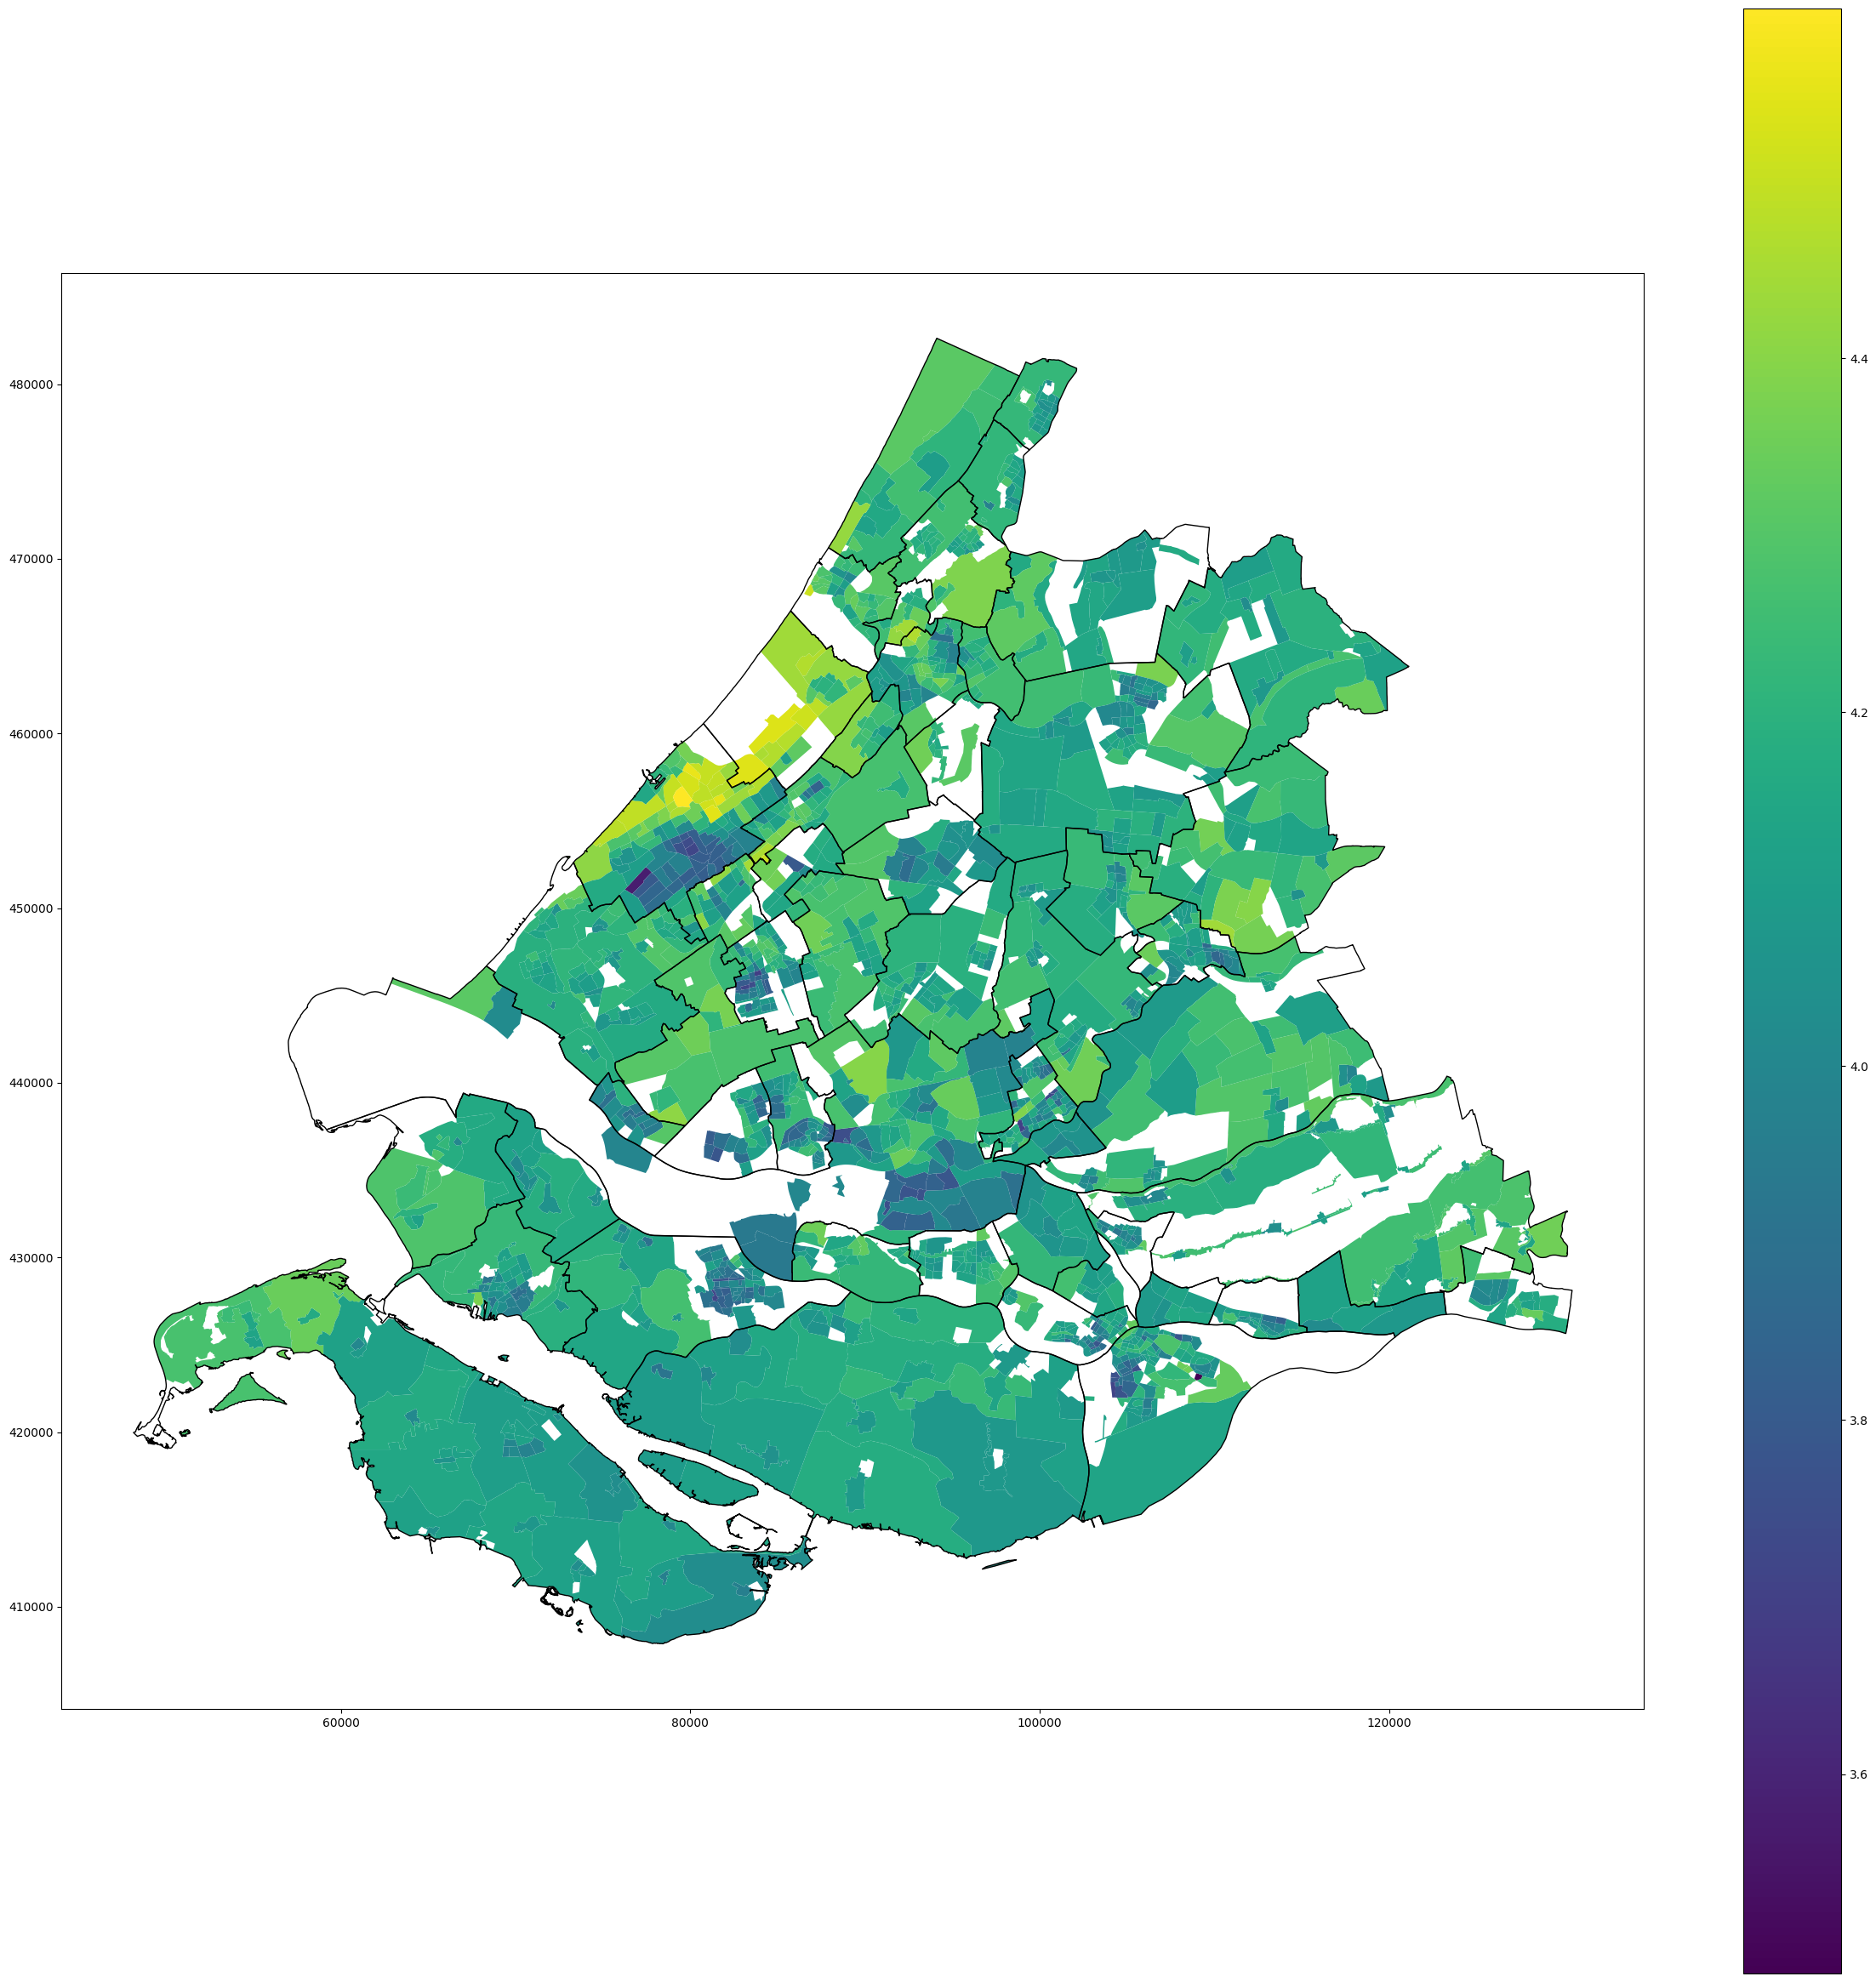

In [27]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
fig, ax = plt.subplots(figsize=(30,30))
buurt_df.loc[buurt_df['Provincienaam'] == 'Zuid-Holland'].plot(ax=ax, column = 'lbm', legend = True)
gemeente_df.loc[gemeente_df['Provincienaam']== 'Zuid-Holland'].plot(ax=ax, color = 'none', edgecolor = 'black')
# gemeente_df.apply(lambda x: ax.annotate(text=x['GM_NAAM'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

#### 3. Exploring associations
To explore associations, we use correlation heat maps, scatter plots and boxplots <br>

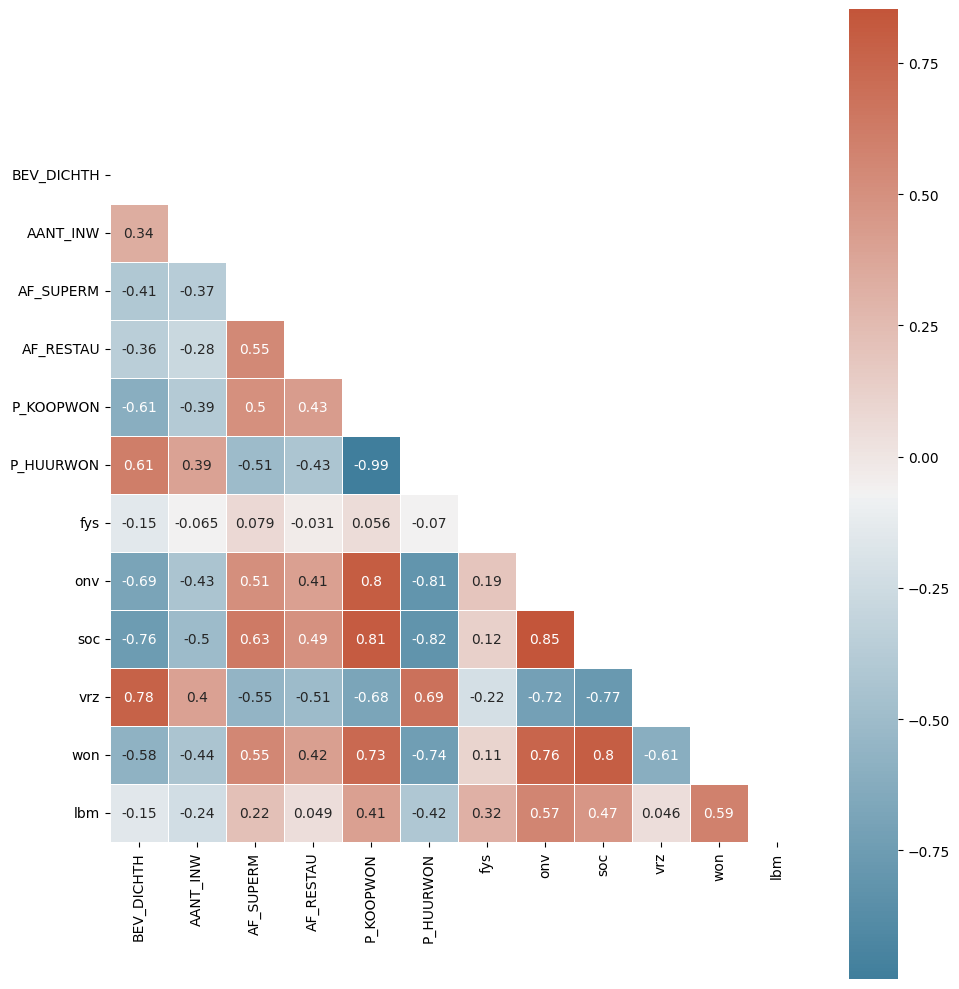

In [28]:
# heatmap of correlations
# Create plot
fig, axes = plt.subplots(figsize=(10, 10))
fig.set_tight_layout(True)

# Compute correlation matrix
corr = wijk_df[['BEV_DICHTH','AANT_INW','AF_SUPERM','AF_RESTAU','P_KOOPWON','P_HUURWON', 'fys', 'onv', 'soc', 'vrz', 'won','lbm']].corr()

# Create upper triangular matrix to mask the upper triangular part of the heatmap
corr_mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap (because it looks better)
corr_cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask = corr_mask, cmap=corr_cmap, annot=True,square = True, linewidths=.5, ax = axes)
plt.show()

**Interpretation of the results** <br>
1. Pearson corr coefficients range from [-0.99,0.86] 
2. *P_HUURWON* and *P_KOOPWON* correlate (almost) 1 to 1 (which makes sense).<br>

Looking at the bottom row for lbm, we see that:<br>

3. *BEV_DICHTH*, *AANT_INW*, *P_HUURWON* correlate negatively with liveability
4. *AF_SUPERM*, *AF_RESTAU*, *P_KOOPWON*, *fys*, *onv*, *soc*, *vrz*, *won* correlate positively with liveability
5. lbm correlates strongest with *onv* (nuisance and insecurity), *soc* (social cohesion), *won* (housing stock)


Text(0.5, 0, 'Percentage rental homes [%]')

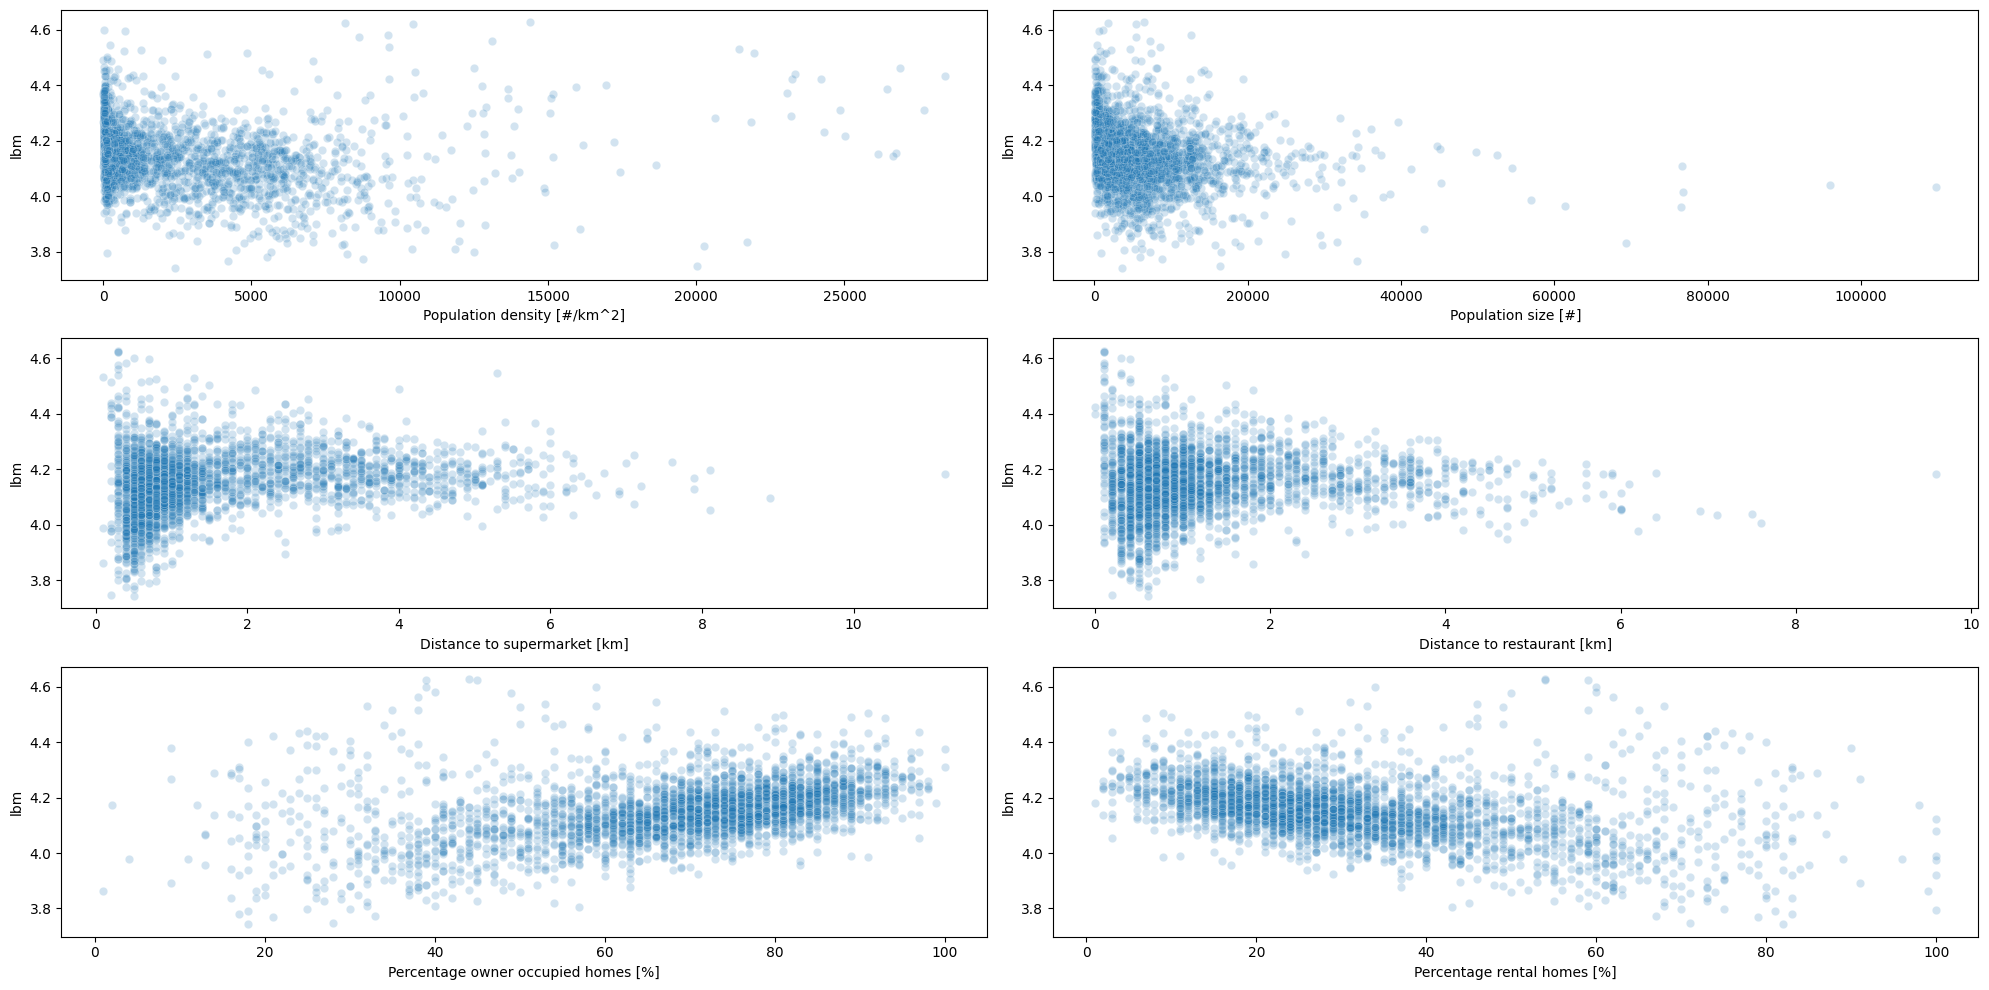

In [29]:
# Further explore linear associations using scatter plots
# plot
fig, axes = plt.subplots(3, 2, figsize=(20, 10))
fig.set_tight_layout(True)
sns.scatterplot(ax = axes[0,0],x = wijk_df.BEV_DICHTH, y = wijk_df.lbm, alpha = 0.2)
sns.scatterplot(ax = axes[0,1],x = wijk_df.AANT_INW, y = wijk_df.lbm, alpha = 0.2)   
sns.scatterplot(ax = axes[1,0],x = wijk_df.AF_SUPERM, y = wijk_df.lbm, alpha = 0.2)
sns.scatterplot(ax = axes[1,1],x = wijk_df.AF_RESTAU, y = wijk_df.lbm, alpha = 0.2)
sns.scatterplot(ax = axes[2,0],x = wijk_df.P_KOOPWON[wijk_df.P_KOOPWON>0], y = wijk_df.lbm[wijk_df.P_KOOPWON>0], alpha = 0.2)   
sns.scatterplot(ax = axes[2,1],x = wijk_df.P_HUURWON[wijk_df.P_HUURWON>0], y = wijk_df.lbm[wijk_df.P_HUURWON>0], alpha = 0.2)   


axes[0,0].set_xlabel('Population density [#/km^2]')
axes[0,1].set_xlabel('Population size [#]')
axes[1,0].set_xlabel('Distance to supermarket [km]')
axes[1,1].set_xlabel('Distance to restaurant [km]')
axes[2,0].set_xlabel('Percentage owner occupied homes [%]')
axes[2,1].set_xlabel('Percentage rental homes [%]')

**Interpretation of the results** <br>
* The scatter plots show the bivariate relations with liveability is strongest for *P_KOOPWON* and *P_HUURWON*.
* For *BEV_DICHTH*, *AANT_INW*, *AF_RESTAU* and *P_KOOPWON* the data seems skewed, condensed around x = 0. 

**Boxplot analysis** <br>

When one of the features is categorical a **boxplot** can be insightful. <br>
Boxplots are informative as they also reveal insights on the locality, spread and skewness of numerical data through their quartiles, see https://en.wikipedia.org/wiki/Box_plot.<br>
Below we create a boxplot showing the liveability across a selected number of municipalities based on the liveabilities scores at the buurt level.
Add your own municipality to see if the liveability scores are in line with your own perceptions.

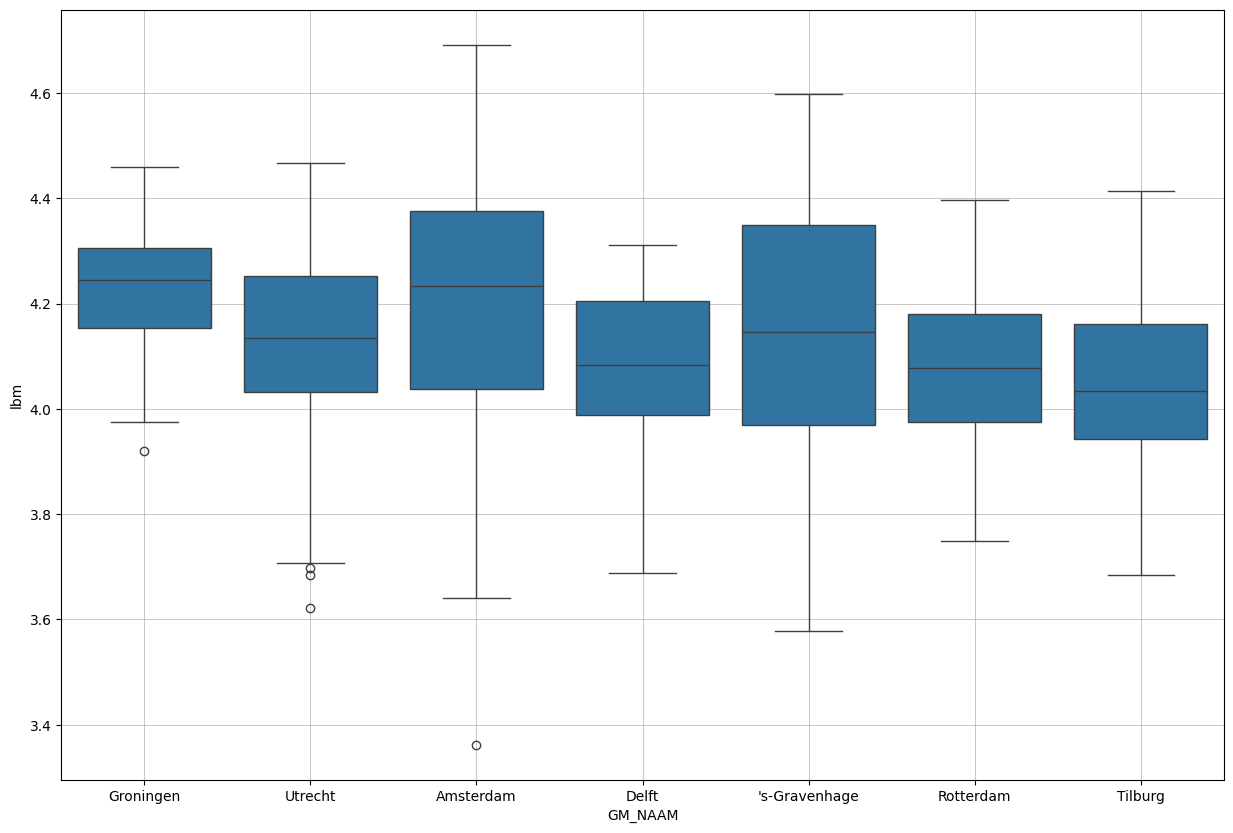

In [64]:
# Box plot
fig, axes = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
GM_select = ['Amsterdam','Rotterdam','Utrecht',"'s-Gravenhage",'Groningen','Tilburg', 'Delft']
df_GM_select = buurt_df[buurt_df['GM_NAAM'].isin(GM_select)]
sns.boxplot(ax = axes, y = df_GM_select.lbm, x = df_GM_select.GM_NAAM, orient="v" )

axes.grid(True,linewidth = 0.5)
plt.show()

**Interpretation of results**
* Looking at the **median** scores, Amsterdam and Groninger are the best municipalities to live in. <br>
* Unlike Groningen, Amsterdam also has very unliveable buurten. This can be seen from the outliers at the lower side.
* Larger cities seem to have a higher variance in the liveability scores across buurten (which is to be expected).

<br>

### <span style="color:skyblue">Exercise 5:  Scatter the median liveability scores of gemeentes based on wijk and buurt level data</span> 
`A` Create a scatter plot in which the median liveability score of the gemeente as computed using wijk level data is at the x-axis and the median liveability score as computed using buurt level data is at the y-axis. (hint: use the pandas method groupby)<br>
`B` Interpret the results


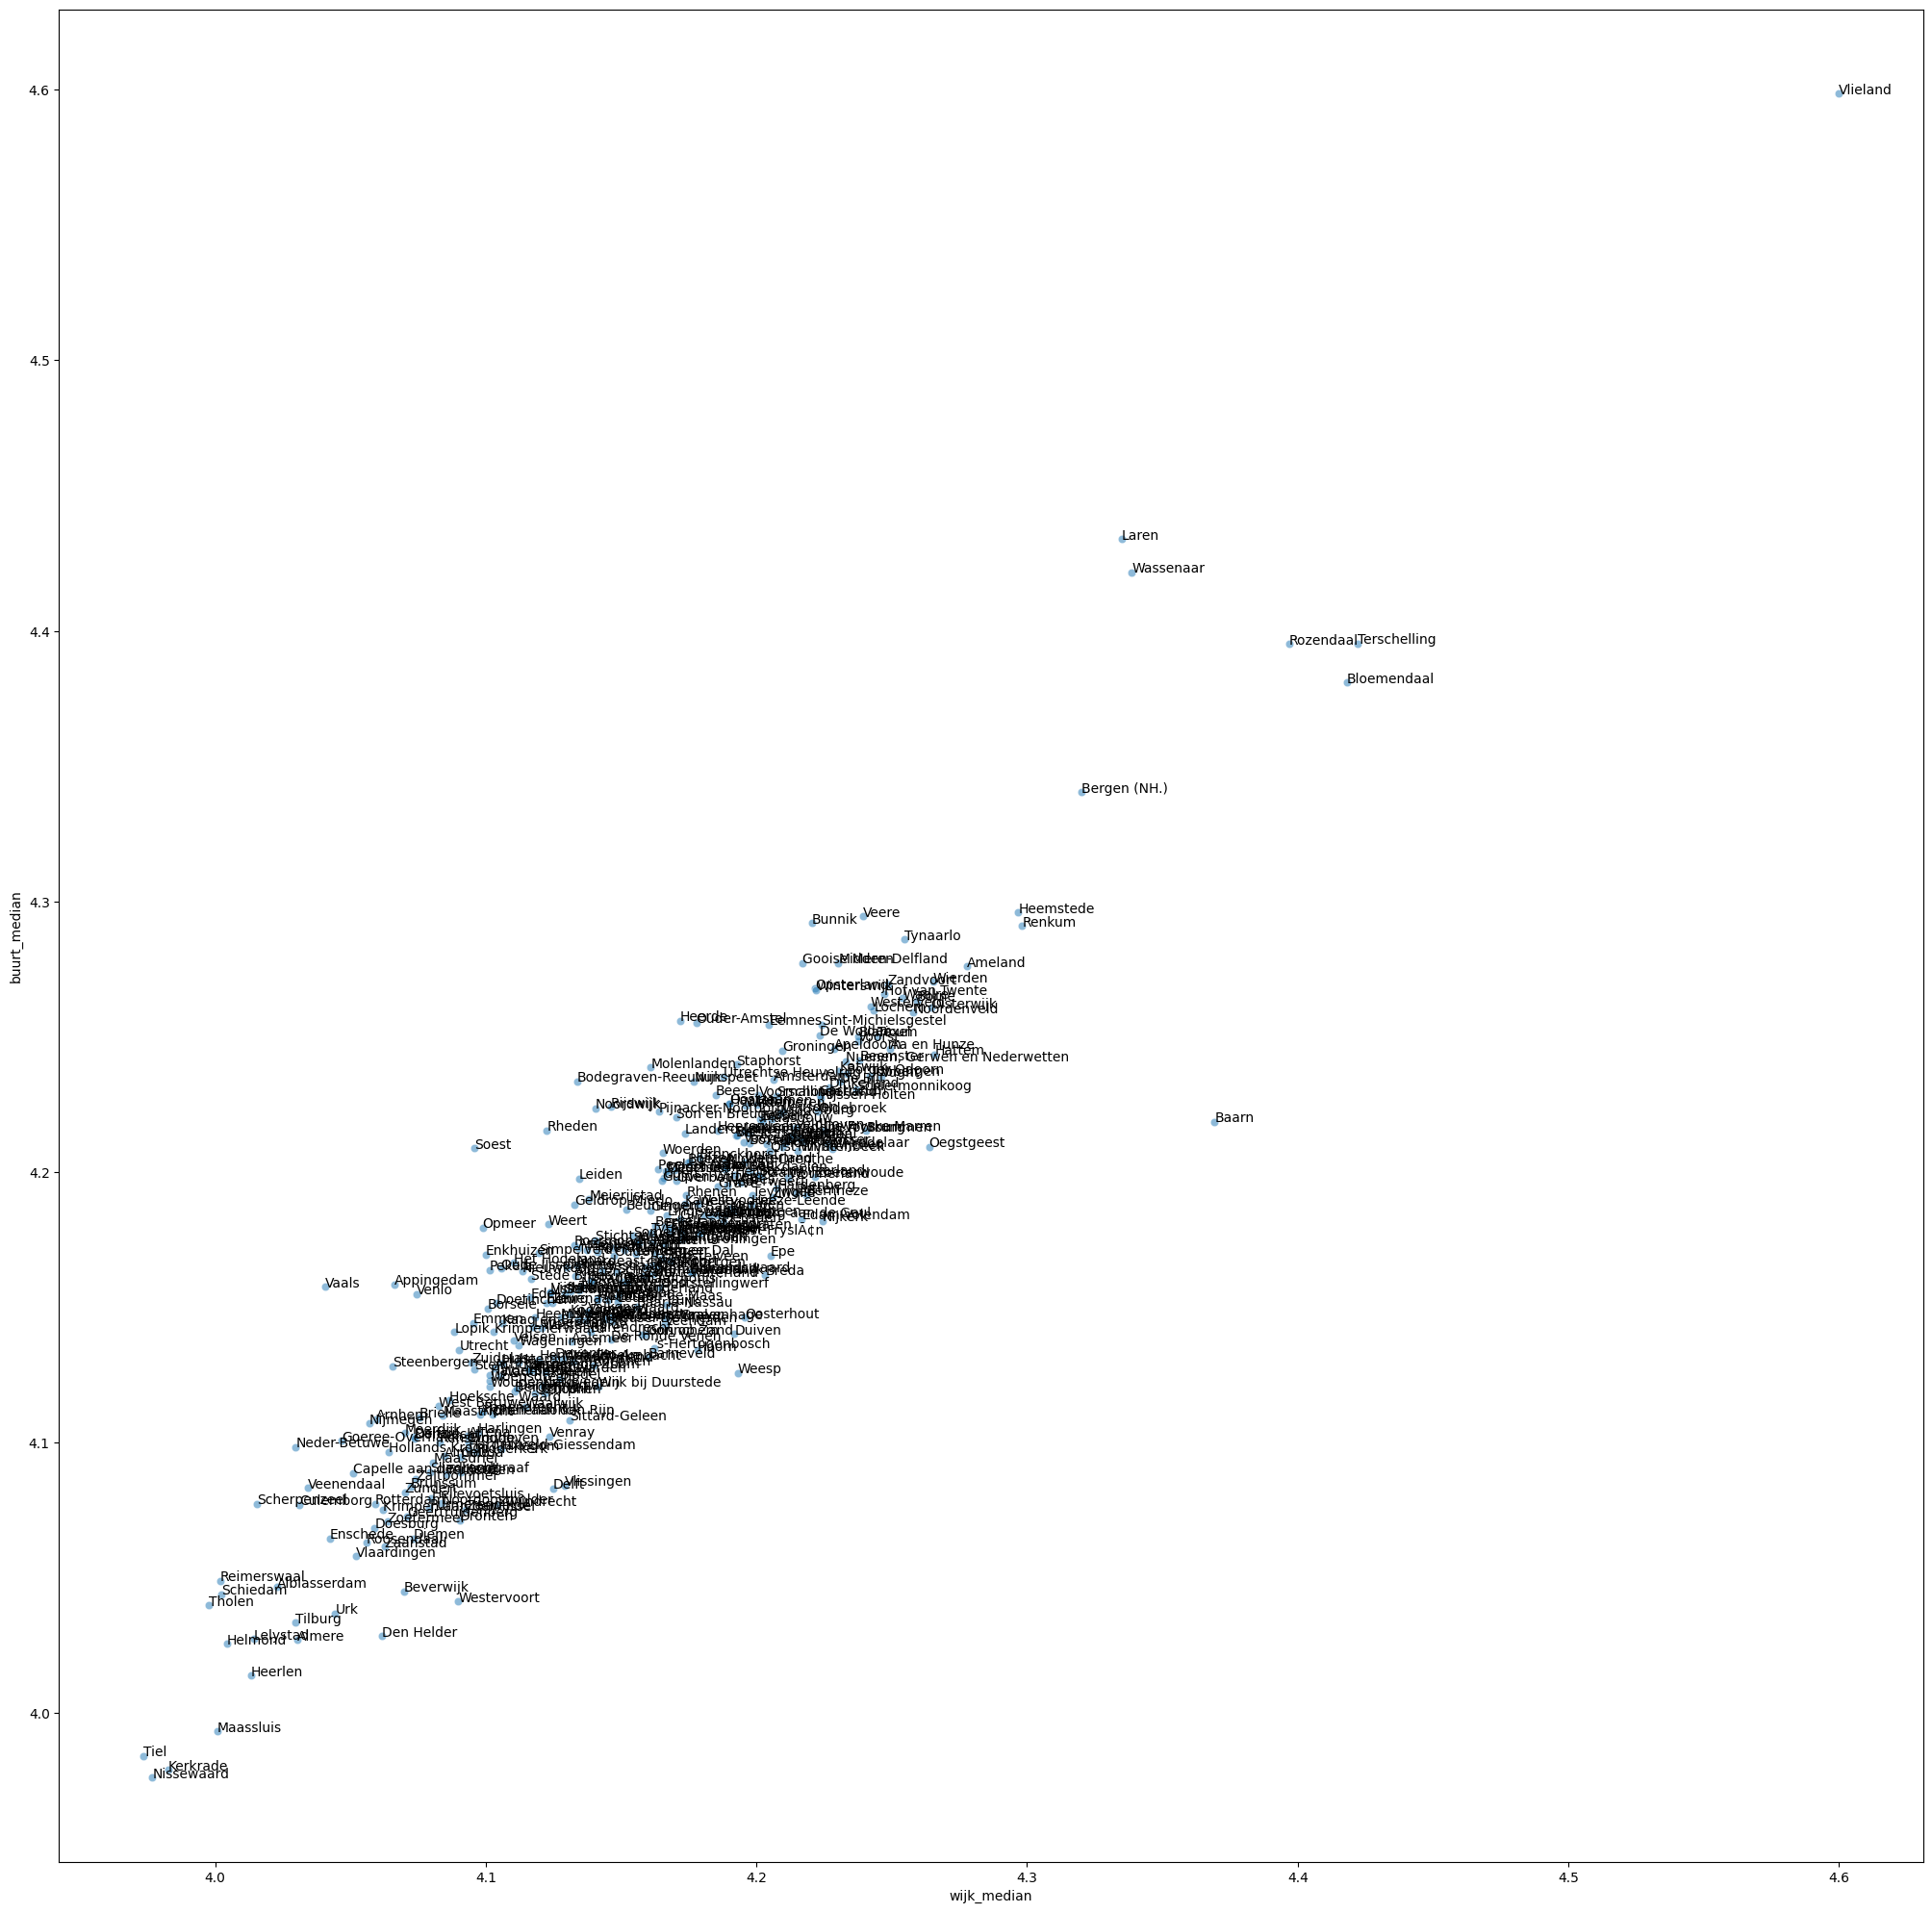

In [ ]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
# fix, axes = plt.subplots(1, 1, figsize=(15, 10), sharex=True)
x = wijk_df.groupby('GM_CODE')['lbm'].median()
y = buurt_df.groupby('GM_CODE')['lbm'].median()
xy = pd.concat([x, y], axis=1, keys=['wijk_median', 'buurt_median']).dropna()

fig,ax = plt.subplots(figsize = (25,25))
sns.scatterplot(ax = ax, x = xy['wijk_median'], y = xy['buurt_median'], alpha = 0.5)
axes.set_xlabel('median liveability score per gemeente using wijk data')
axes.set_ylabel('median liveability score per gemeente using buurt data')
for i, gem_name in enumerate(gemeente_df.GM_CODE):
    plt.text(x.iloc[i],y.iloc[i],gemeente_df.GM_NAAM.iloc[i])
plt.show()

## 4. Conducting multiple linear regression analyses
Regression models are often used to obtain first insights on the relationship between a (scalar) target and one or more features. Regression models come in many different forms: e.g. simple, multiple, ordinal, Poisson, etc. Usually, a multiple linear regression model serves as a good benchmark.

In ML the focus is usually on generalisation. That is, the model performance is evaluated by looking at the performance on an unseen set of the data (generalisation performance).<br>

For these analyses, we use the **sk-learn** Python library. This Python library is especially designed machine learning.
Having seen the scatter plots and bar plots, we focus on the following 7 features: *ANNT_INW*, *BEV_DICHTH*, *P_KOOPWON*, *fys*, *soc*, *won*, and *onv*

In [32]:
# Set the seed number for reproducibility. It governs which data points go to the test set and which go to the training set
rs = 12345

# Create X
X_lin = pd.DataFrame([buurt_df["AANT_INW"].div(100000),buurt_df["BEV_DICHTH"].div(10000), buurt_df["P_KOOPWON"].div(100),buurt_df["fys"],buurt_df["soc"],buurt_df["won"],buurt_df["onv"]]).transpose()


# Create Y
Y = buurt_df.lbm

# Create linear regression object
regr = LinearRegression(fit_intercept = True)

# Split the data in a train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X_lin, Y, test_size=0.25,random_state = rs)

# Fit the model on the training data
regr.fit(X_train,Y_train)

# Evaluate the model generalisation performance on the Train and Test data sets
Y_pred_train = regr.predict(X_train)
mse_train = mean_squared_error(Y_train,Y_pred_train)
R2_train = r2_score(Y_train,Y_pred_train)

Y_pred_test = regr.predict(X_test)
mse_test  = mean_squared_error(Y_test, Y_pred_test)
R2_test = r2_score(Y_test,Y_pred_test)

# Print results
print('Results linear multiple regression model')
print(f'Mean Squared Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
print(f'R2                 Train | Test: \t{R2_train:>7.4f}\t|  {R2_test:>7.4f}\n')
print('Weights')
print(f'Intercept: \t\t\t {regr.intercept_:>7.4f}')
for n in range(len(regr.coef_)):
    print(f'Weight_{X_lin.keys()[n]:10s} \t\t {regr.coef_[n]:>7.4f}')

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0066	|   0.0071
R2                 Train | Test: 	 0.5991	|   0.5820

Weights
Intercept: 			  4.0516
Weight_AANT_INW   		 -0.0626
Weight_BEV_DICHTH 		  0.1351
Weight_P_KOOPWON  		 -0.0259
Weight_fys        		  0.7715
Weight_soc        		  0.3782
Weight_won        		  1.1780
Weight_onv        		  0.6743


**Interpretation of results**
* Looking at the MSE and R2, we see that the performance on the **test** data set is roughly equal to the performance on the **train** data set. This tells us that the model is not overfitting.
* An advantage of regression models is that their weights are interpretable. For instance, the positive and comparatively large weight associated with *BEV_DICHTH* tells us that high population density is associated with high liveability. 
<br>

### <span style="color:skyblue">Exercise 6:  Impact of seed number on the regression results</span> 
`A` Re-do the regression using different seed numbers (e.g. 1,2,3,4. etc) and reflect on the stability of the results<br>

In [33]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
for i in range(5):
    # Set the seed number for reproducibility. It governs which data points go to the test set and which go to the training set
    rs = i

    # Create X
    X_lin = pd.DataFrame([buurt_df["AANT_INW"].div(100000),buurt_df["BEV_DICHTH"].div(10000), buurt_df["P_KOOPWON"].div(100),buurt_df["fys"],buurt_df["soc"],buurt_df["won"],buurt_df["onv"]]).transpose()


    # Create Y
    Y = buurt_df.lbm

    # Create linear regression object
    regr = LinearRegression(fit_intercept = True)

    # Split the data in a train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X_lin, Y, test_size=0.25,random_state = rs)

    # Fit the model on the training data
    regr.fit(X_train,Y_train)

    # Evaluate the model generalisation performance on the Train and Test data sets
    Y_pred_train = regr.predict(X_train)
    mse_train = mean_squared_error(Y_train,Y_pred_train)
    R2_train = r2_score(Y_train,Y_pred_train)

    Y_pred_test = regr.predict(X_test)
    mse_test  = mean_squared_error(Y_test, Y_pred_test)
    R2_test = r2_score(Y_test,Y_pred_test)

    # Print results
    print('Results linear multiple regression model')
    print(f'Mean Squared Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
    print(f'R2                 Train | Test: \t{R2_train:>7.4f}\t|  {R2_test:>7.4f}\n')
    # print('Weights')
    # print(f'Intercept: \t\t\t {regr.intercept_:>7.4f}')
    # for n in range(len(regr.coef_)):
    #     print(f'Weight_{X_lin.keys()[n]:10s} \t\t {regr.coef_[n]:>7.4f}')

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0068	|   0.0065
R2                 Train | Test: 	 0.5993	|   0.5790

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0067	|   0.0066
R2                 Train | Test: 	 0.5906	|   0.6066

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0067	|   0.0068
R2                 Train | Test: 	 0.6015	|   0.5732

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0067	|   0.0068
R2                 Train | Test: 	 0.5924	|   0.6011

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0068	|   0.0065
R2                 Train | Test: 	 0.5956	|   0.5917



Very stable results

### <span style="color:skyblue">Exercise 7:  Generalisation</span> 
`A` Train a new extended multiple regression model. To do so, add 13 extra features to the model that could be associated with liveability. For this extended model, compute the Mean Squared Error and R2 both for the train and test data sets.<br>
`B` The picture below shows the Bias-Variance trade-off. Looking at the MSE and R2 of the model with 7 features and the extended model (with 20 features), where do you think these two models can be placed in the picture (Region A, B, C, D, or E)?  Explain your answer.
<br><br><br>
![Bias_variance_tradeoff](data/Bias_variance.png)

In [34]:
# X_lin = pd.DataFrame([buurt_df["AANT_INW"].div(100000),buurt_df["BEV_DICHTH"].div(10000), buurt_df["P_KOOPWON"].div(100),buurt_df["fys"],buurt_df["soc"],buurt_df["won"],buurt_df["onv"]]).transpose()
#
# while len(X_lin.columns) < 20:
#     pick = np.random.choice(buurt_df.iloc[:,10:-5].columns)
#     if pick in X_lin.columns:
#         continue
#     else:
#         X_lin[pick] = buurt_df[pick]


In [35]:
# X_lin

In [36]:
# X_lin.merge(buurt_df.lbm, how = 'left', on = '')

In [37]:
X_lin = X_lin.replace(-99999999, np.nan)

In [38]:
# X_lin = X_lin.drop(columns = 'P_MAROKKO')


In [39]:
# X_lin = X_lin.dropna()


In [40]:
# np.random.choice(buurt_df.iloc[:,10:-5].columns)

In [85]:
buurt_df.iloc[:,10:]


DEK_PERC   OAD  STED  BEV_DICHTH  AANT_INW  AANT_MAN  AANT_VROUW  \
0             1  1209     3        2845      2395      1150        1245   
1             6   902     4        1909      3015      1475        1540   
2             1  1138     3        1983      5640      2730        2910   
3             4   362     5          60       320       175         145   
4             1    79     5          19       105        55          45   
...         ...   ...   ...         ...       ...       ...         ...   
11398         1   271     5        3574      1750       880         875   
11399         1    50     5        2362       130        65          65   
11400         1    75     5        3843       435       230         210   
11401         1    34     5         550       155        75          80   
11402         1    59     5         583       110        60          50   

       P_00_14_JR  P_15_24_JR  P_25_44_JR  ...              versie  jaar  \
0              10           9          21  ...  Leefbaarometer 3.0  2020   
1              15          12          18  ...  Leefbaarometer 3.0  2020   
2              15          11          21  ...  Leefbaarometer 3.0  2020   
3              19          14          21  ...  Leefbaarometer 3.0  2020   
4              13          15          10  ...  Leefbaarometer 3.0  2020   
...           ...         ...         ...  ...                 ...   ...   
11398          16          15          19  ...  Leefbaarometer 3.0  2020   
11399          13          18          21  ...  Leefbaarometer 3.0  2020   
11400          13          17          18  ...  Leefbaarometer 3.0  2020   
11401          25          14          12  ...  Leefbaarometer 3.0  2020   
11402          17          14          16  ...  Leefbaarometer 3.0  2020   

                                   bu_naam       lbm       afw       fys  \
0                       Appingedam-Centrum  4.118757  0.016493  0.018589   
1                          Appingedam-West  4.104090  0.001825  0.008886   
2                          Appingedam-Oost  4.011682 -0.090583  0.023694   
3      Verspr.h. Damsterdiep en Eemskanaal  4.228319  0.126054 -0.004327   
4      Verspr.h. ten zuiden van Eemskanaal  4.197940  0.095675 -0.076229   
...                                    ...       ...       ...       ...   
11398                      Streefkerk-Dorp  4.048459 -0.053806  0.013232   
11399                            Waal-Dorp  4.303261  0.200997  0.053815   
11400                            Kern-Dorp  4.108811  0.006547 -0.024570   
11401                   Lintbebouwing-Oost  4.283532  0.181267 -0.037473   
11402                   Lintbebouwing-West  4.262430  0.160165 -0.031042   

            onv       soc       vrz       won  
0      0.018267  0.016757 -0.066506  0.029385  
1      0.040026  0.036772 -0.117861  0.034001  
2     -0.006718 -0.000822 -0.105294 -0.001442  
3      0.097363  0.112268 -0.156507  0.077258  
4      0.098263  0.126321 -0.200758  0.148077  
...         ...       ...       ...       ...  
11398  0.074421  0.022650 -0.178354  0.014245  
11399  0.095860  0.131034 -0.195093  0.115381  
11400  0.100591  0.033048 -0.132971  0.030448  
11401  0.130815  0.129357 -0.136171  0.094740  
11402  0.116151  0.123577 -0.134305  0.085784  

[11403 rows x 186 columns]

In [42]:
X_lin = pd.DataFrame([buurt_df["AANT_INW"].div(100000),buurt_df["BEV_DICHTH"].div(10000), buurt_df["P_KOOPWON"].div(100),buurt_df["fys"],buurt_df["soc"],buurt_df["won"],buurt_df["onv"], buurt_df['fys']]).transpose()

In [43]:
buurt_df.iloc[:,10:-5]
print(buurt_df.iloc[:,30:45].isnull().sum())
print(buurt_df.iloc[:,30:45].columns)

AANTAL_HH    0
P_EENP_HH    0
P_HH_Z_K     0
P_HH_M_K     0
GEM_HH_GR    0
P_WEST_AL    0
P_N_W_AL     0
P_MAROKKO    0
P_ANT_ARU    0
P_SURINAM    0
P_TURKIJE    0
P_OVER_NW    0
A_BED_A      0
A_BED_BF     0
A_BED_GI     0
dtype: int64
Index(['AANTAL_HH', 'P_EENP_HH', 'P_HH_Z_K', 'P_HH_M_K', 'GEM_HH_GR',
       'P_WEST_AL', 'P_N_W_AL', 'P_MAROKKO', 'P_ANT_ARU', 'P_SURINAM',
       'P_TURKIJE', 'P_OVER_NW', 'A_BED_A', 'A_BED_BF', 'A_BED_GI'],
      dtype='object')


In [44]:
for i in buurt_df.iloc[:,15:30].columns:
    X_lin[i] = buurt_df[i]

X_lin

AANT_INW  BEV_DICHTH  P_KOOPWON       fys       soc       won  \
0       0.02395      0.2845       0.41  0.018589  0.016757  0.029385   
1       0.03015      0.1909       0.69  0.008886  0.036772  0.034001   
2       0.05640      0.1983       0.39  0.023694 -0.000822 -0.001442   
3       0.00320      0.0060       0.97 -0.004327  0.112268  0.077258   
4       0.00105      0.0019       0.88 -0.076229  0.126321  0.148077   
...         ...         ...        ...       ...       ...       ...   
11398   0.01750      0.3574       0.58  0.013232  0.022650  0.014245   
11399   0.00130      0.2362       0.93  0.053815  0.131034  0.115381   
11400   0.00435      0.3843       0.76 -0.024570  0.033048  0.030448   
11401   0.00155      0.0550       0.90 -0.037473  0.129357  0.094740   
11402   0.00110      0.0583       0.95 -0.031042  0.123577  0.085784   

            onv       fys  AANT_MAN  AANT_VROUW  ...  P_45_64_JR  P_65_EO_JR  \
0      0.018267  0.018589      1150        1245  ...          30          30   
1      0.040026  0.008886      1475        1540  ...          33          22   
2     -0.006718  0.023694      2730        2910  ...          27          27   
3      0.097363 -0.004327       175         145  ...          36           9   
4      0.098263 -0.076229        55          45  ...          48          13   
...         ...       ...       ...         ...  ...         ...         ...   
11398  0.074421  0.013232       880         875  ...          28          22   
11399  0.095860  0.053815        65          65  ...          40           8   
11400  0.100591 -0.024570       230         210  ...          31          22   
11401  0.130815 -0.037473        75          80  ...          25          23   
11402  0.116151 -0.031042        60          50  ...          29          25   

       P_ONGEHUWD  P_GEHUWD  P_GESCHEID  P_VERWEDUW  GEBOO_TOT  P_GEBOO  \
0              42        36          12           9          0        0   
1              42        47           7           4          0        0   
2              43        40           9           8          0        0   
3              52        42           4           2          0        0   
4              41        53           5           1          0        0   
...           ...       ...         ...         ...        ...      ...   
11398          41        49           5           5          0        0   
11399          44        52           2           2          0        0   
11400          37        53           3           6          0        0   
11401          43        53           1           3          0        0   
11402          37        59           1           4          0        0   

       STERFT_TOT  P_STERFT  
0               0         0  
1               0         0  
2               0         0  
3               0         0  
4               0         0  
...           ...       ...  
11398           0         0  
11399           0         0  
11400           0         0  
11401           0         0  
11402           0         0  

[11403 rows x 23 columns]

In [45]:
X_lin.describe()

AANT_INW    BEV_DICHTH     P_KOOPWON           fys           soc  \
count  11403.000000  11403.000000  11403.000000  11403.000000  11403.000000   
mean       0.015162      0.357210      0.673919      0.002966      0.035691   
std        0.017372      0.406646      0.226432      0.042566      0.061097   
min        0.001000      0.000400      0.000000     -0.388128     -0.139082   
25%        0.003750      0.032700      0.540000     -0.017352     -0.008419   
50%        0.009800      0.249700      0.730000      0.001154      0.035659   
75%        0.020000      0.539550      0.850000      0.022271      0.084604   
max        0.288700      5.217300      1.000000      0.374916      0.395880   

                won           onv           fys      AANT_MAN    AANT_VROUW  \
count  11403.000000  11403.000000  11403.000000  11403.000000  11403.000000   
mean       0.027655      0.040455      0.002966    752.446286    763.059283   
std        0.053660      0.079618      0.042566    854.816527    883.918768   
min       -0.464001     -0.506062     -0.388128     40.000000     10.000000   
25%       -0.003276      0.003761     -0.017352    195.000000    185.000000   
50%        0.028216      0.062919      0.001154    485.000000    490.000000   
75%        0.062311      0.097677      0.022271    985.000000   1010.000000   
max        0.232434      0.162514      0.374916  13615.000000  15250.000000   

       ...    P_45_64_JR    P_65_EO_JR    P_ONGEHUWD      P_GEHUWD  \
count  ...  11403.000000  11403.000000  11403.000000  11403.000000   
mean   ...     29.621503     20.585898     46.525739     41.384373   
std    ...      6.337096      9.258600      9.916354      9.453875   
min    ...      0.000000      0.000000      4.000000      0.000000   
25%    ...     26.000000     15.000000     41.000000     37.000000   
50%    ...     30.000000     20.000000     45.000000     43.000000   
75%    ...     34.000000     25.000000     50.000000     47.000000   
max    ...     62.000000     98.000000    100.000000     79.000000   

         P_GESCHEID    P_VERWEDUW  GEBOO_TOT  P_GEBOO  STERFT_TOT  P_STERFT  
count  11403.000000  11403.000000    11403.0  11403.0     11403.0   11403.0  
mean       7.143997      4.952907        0.0      0.0         0.0       0.0  
std        3.092640      3.572902        0.0      0.0         0.0       0.0  
min        0.000000      0.000000        0.0      0.0         0.0       0.0  
25%        5.000000      3.000000        0.0      0.0         0.0       0.0  
50%        7.000000      4.000000        0.0      0.0         0.0       0.0  
75%        9.000000      6.000000        0.0      0.0         0.0       0.0  
max       28.000000     61.000000        0.0      0.0         0.0       0.0  

[8 rows x 23 columns]

In [46]:
# CODE YOUR ANSWERS HERE (Use as many cells as you need)
# A
# Set the seed number for reproducibility. It governs which data points go to the test set and which go to the training set
for i in range(5):
    rs = i

    # Create X
    # X_lin = pd.DataFrame([buurt_df["AANT_INW"].div(100000),buurt_df["BEV_DICHTH"].div(10000), buurt_df["P_KOOPWON"].div(100),buurt_df["fys"],buurt_df["soc"],buurt_df["won"],buurt_df["onv"]]).transpose()


    # Create Y
    Y = buurt_df.lbm

    # Create linear regression object
    regr = LinearRegression(fit_intercept = True)

    # Split the data in a train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X_lin, Y, test_size=0.25,random_state = rs)

    # Fit the model on the training data
    regr.fit(X_train,Y_train)

    # Evaluate the model generalisation performance on the Train and Test data sets
    Y_pred_train = regr.predict(X_train)
    mse_train = mean_squared_error(Y_train,Y_pred_train)
    R2_train = r2_score(Y_train,Y_pred_train)

    Y_pred_test = regr.predict(X_test)
    mse_test  = mean_squared_error(Y_test, Y_pred_test)
    R2_test = r2_score(Y_test,Y_pred_test)

    # Print results
    print('Results linear multiple regression model')
    print(f'Mean Squared Error Train | Test: \t{mse_train:>7.4f}\t|  {mse_test:>7.4f}')
    print(f'R2                 Train | Test: \t{R2_train:>7.4f}\t|  {R2_test:>7.4f}\n')
    # print('Weights')
    # print(f'Intercept: \t\t\t {regr.intercept_:>7.4f}')
    # for n in range(len(regr.coef_)):
    #     print(f'Weight_{X_lin.keys()[n]:10s} \t\t {regr.coef_[n]:>7.4f}')


Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0052	|   0.0051
R2                 Train | Test: 	 0.6905	|   0.6736

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0052	|   0.0052
R2                 Train | Test: 	 0.6850	|   0.6917

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0051	|   0.0053
R2                 Train | Test: 	 0.6922	|   0.6686

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0052	|   0.0051
R2                 Train | Test: 	 0.6825	|   0.6984

Results linear multiple regression model
Mean Squared Error Train | Test: 	 0.0052	|   0.0051
R2                 Train | Test: 	 0.6890	|   0.6793



# B
We observe overfitting because the test scores are often higher then the train scores.

They don't perform differently. They are both probably in the region B/C. They perform very well, for the Variance is small and the bias if very little because the train and test scores are very similar.